# Business Understanding:
__The aim of this study is to find the following:__
* What are the most used technologies/programming languages over the years ?
* What are the new technologies that emerged recently ?
* How did the appearance of new technologies impact the usage of older ones ?

# Data Understanding:
__Each year since 2011, Stack Overflow has asked developers about their favorite technologies, coding habits, and work preferences, as well as how they learn, share, and level up.__

__Here we used the StackOverflow data to attempt to answer our questions of interest and discover the trends over the years.__

__Note:We didn't take into consideration the dataset of 2011 and 2012 as the question used for that purpose is "Which languages are you proficient in?" while in later datasets the question used is "Which of the following languages or technologies have you used significantly in the past year?__

__While the two are similar, we chose to treat them differently as they hold a bit of a different meaning.__

# Preparing and Modeling the Data:
__In order to find answers to our questions, we must first prepare the data and then model our findings with visual or statistical methods.__

In [1]:
import Helper as hlpr
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [2]:
#Reading the datasets
#The first step is to read the CSVs for each year into a Pandas DataFrame.
#Note: ISO-8859-1 encoding was used as it caused some issues while reading data in datasets older then < 2017
data_2013 = hlpr.read_data('./2013 Stack Overflow Survey Responses/2013 Stack Overflow Survey Responses.csv','ISO-8859-1')
data_2014 = hlpr.read_data('./2014 Stack Overflow Survey Responses/2014 Stack Overflow Survey Responses.csv','ISO-8859-1')
data_2015 = hlpr.read_data('./2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.CSV','ISO-8859-1')
data_2016 = hlpr.read_data('./2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.CSV','ISO-8859-1')
data_2017 = hlpr.read_data('./developer_survey_2017/survey_results_public.CSV','ISO-8859-1')
data_2018 = hlpr.read_data('./developer_survey_2018/survey_results_public.CSV','ISO-8859-1')
data_2019 = hlpr.read_data('./developer_survey_2019/survey_results_public.CSV','ISO-8859-1')

C:\Users\Sheri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\Sheri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
C:\Users\Sheri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
#A quick look at each dataset in terms of dimensions and columns
#2013 Survey results data set:
print(data_2013.columns)
data_2013.shape

Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you currently work in?',
       'How many people work for your company?',
       'Which of the following best describes your occupation?',
       'Including yourself, how many developers are employed at your company?',
       'How large is the team that you work on?',
       'What other departments / roles do you interact with regularly?',
       ...
       'Unnamed: 118', 'Unnamed: 119', 'Unnamed: 120', 'Unnamed: 121',
       'What advertisers do you remember seeing on Stack Overflow?',
       'What is your current Stack Overflow reputation?',
       'How do you use Stack Overflow?', 'Unnamed: 125', 'Unnamed: 126',
       'Unnamed: 127'],
      dtype='object', length=128)


(9743, 128)

In [4]:
#2014 Survey results data set:
print(data_2014.columns)
data_2014.shape

Index(['What Country do you live in?', 'Unnamed: 1',
       'Which US State or Territory do you live in?', 'How old are you?',
       'What is your gender?',
       'How many years of IT/Programming experience do you have?',
       'Which of the following best describes your occupation?',
       'Including bonus, what is your annual compensation in USD?',
       'How would you best describe the industry you currently work in?',
       'How many developers are employed at your company?',
       ...
       'Did you participate in the Apptivate contest?',
       'What advertisers do you remember seeing on Stack Overflow?',
       'What is your current Stack Overflow reputation?',
       'How do you use Stack Overflow?', 'Unnamed: 114', 'Unnamed: 115',
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118',
       'How often do you find solutions to your programming problems on Stack Overflow without asking a new question?'],
      dtype='object', length=120)


(7644, 120)

In [5]:
#2015 Survey results data set:
print(data_2015.columns)
data_2015.shape

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Select all that apply',
       'Unnamed: 9',
       ...
       'Unnamed: 212', 'Unnamed: 213', 'Select all that apply.7',
       'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217', 'Unnamed: 218',
       'Unnamed: 219', 'Unnamed: 220', 'Unnamed: 221'],
      dtype='object', length=222)


(26087, 222)

In [6]:
#2016 Survey results data set:
print(data_2016.columns)
data_2016.shape

Index(['Unnamed: 0', 'collector', 'country', 'un_subregion', 'so_region',
       'age_range', 'age_midpoint', 'gender', 'self_identification',
       'occupation', 'occupation_group', 'experience_range',
       'experience_midpoint', 'salary_range', 'salary_midpoint',
       'big_mac_index', 'tech_do', 'tech_want', 'aliens',
       'programming_ability', 'employment_status', 'industry',
       'company_size_range', 'team_size_range', 'women_on_team', 'remote',
       'job_satisfaction', 'job_discovery', 'dev_environment',
       'commit_frequency', 'hobby', 'dogs_vs_cats', 'desktop_os',
       'unit_testing', 'rep_range', 'visit_frequency', 'why_learn_new_tech',
       'education', 'open_to_new_job', 'new_job_value', 'job_search_annoyance',
       'interview_likelihood', 'how_to_improve_interview_process',
       'star_wars_vs_star_trek', 'agree_tech', 'agree_notice',
       'agree_problemsolving', 'agree_diversity', 'agree_adblocker',
       'agree_alcohol', 'agree_loveboss', 'agree_n

(56030, 66)

In [7]:
#2017 Survey results data set:
print(data_2017.columns)
data_2017.shape

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)


(51392, 154)

In [8]:
#2018 Survey results data set:
print(data_2018.columns)
data_2018.shape

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)


(98855, 129)

In [9]:
#2019 Survey results data set:
print(data_2019.columns)
data_2019.shape

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

(88883, 85)

## 2013 dataset
After checking the 2013 dataset, the structure is all wrong. It appears to have been some kind of a label then a few cells with checkboxes or something similar which results in incorrect headings and a messed up structure that needs repairing.
Note that the first row is useless and each column represents a language or technology on it's own.

In [10]:
#A closer look on the unprepared dataset of 2013 columns shows a serious problem,
#the headers row of this dataset is meaningless, the second row however, contains either an entry for the technology used
#or a nan.
data_2013.head()

What Country or Region do you live in?  \
0                               Response   
1                         United Kingdom   
2               United States of America   
3               United States of America   
4                                Germany   

  Which US State or Territory do you live in? How old are you?  \
0                                    Response         Response   
1                                         NaN            35-39   
2                                      Oregon            25-29   
3                                   Wisconsin            51-60   
4                                         NaN              NaN   

  How many years of IT/Programming experience do you have?  \
0                                           Response         
1                                          6/10/2013         
2                                          6/10/2013         
3                                                 11         
4                                                NaN         

  How would you best describe the industry you currently work in?  \
0                                           Response                
1                                  Finance / Banking                
2                                             Retail                
3                                  Software Products                
4                                                NaN                

  How many people work for your company?  \
0                               Response   
1                                101-999   
2                                101-999   
3                                 26-100   
4                                    NaN   

  Which of the following best describes your occupation?  \
0                                           Response       
1                          Enterprise Level Services       
2                             Back-End Web Developer       
3                          Enterprise Level Services       
4                                                NaN       

  Including yourself, how many developers are employed at your company?  \
0                                           Response                      
1                                                100                      
2                                          6/15/2013                      
3                                          6/15/2013                      
4                                                NaN                      

  How large is the team that you work on?  \
0                                Response   
1                                4/8/2013   
2                                4/8/2013   
3                                Just me!   
4                                     NaN   

  What other departments / roles do you interact with regularly?  \
0                              System Administrators               
1                              System Administrators               
2                              System Administrators               
3                              System Administrators               
4                                                NaN               

            ...                       Unnamed: 118  \
0           ...            The ads are Informative   
1           ...                            Neutral   
2           ...                            Neutral   
3           ...                            Neutral   
4           ...                                NaN   

                      Unnamed: 119  \
0  I click on ads that interest me   
1                          Neutral   
2                            Agree   
3                Strongly Disagree   
4                              NaN   

                                      Unnamed: 120  \
0  I've taken a trial/purchased a product from ads   
1                                          Neutral   
2                                         Disagree   
3                        

In [11]:
cols_2013 = data_2013.columns.tolist()
print(cols_2013)

['What Country or Region do you live in?', 'Which US State or Territory do you live in?', 'How old are you?', 'How many years of IT/Programming experience do you have?', 'How would you best describe the industry you currently work in?', 'How many people work for your company?', 'Which of the following best describes your occupation?', 'Including yourself, how many developers are employed at your company?', 'How large is the team that you work on?', 'What other departments / roles do you interact with regularly?', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'If your company has a native mobile app, what platforms do you support?', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'If you make a software product, how does your company make money? (You can choose more than one)', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnam

In [12]:
#We only need the columns regarding our question so we extract them into a separate dataframe.
pl_2013 = data_2013[[
        'Which of the following languages or technologies have you used significantly in the past year?',
        'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 
        'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 
        'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 
        'Unnamed: 69']]

In [13]:
# Drop first row as it's useless since it only contains unnamed headers.
pl_2013 = pl_2013[1:]

#Rename every row to the language it represents by taking the first non NaN value in the column and assigning it as a the header.
new_headers_2013 = hlpr.column_rename_firstvalue(pl_2013) #You can use the help(hlpr.column_rename_firstvalue) to know more.
pl_2013.columns = new_headers_2013 #Assign the new headers to the dataframe.

#Get the count of each occurence of the language/technology in that column
#and put them into a dictionary to be used later.
pl_2013_counter = {}
pl_2013_counter.fromkeys(new_headers_2013)

for col in pl_2013:
    pl_2013_counter[col]=pl_2013[col].value_counts()[0]

#For the sake of displaying the results in a nice way, we put the dictionary back into a dataframe.
#We also sort the values in descending order to put the most used languages first.
#Lastly, we reset the index to the new sorted order.
df_2013 = pd.DataFrame(list(pl_2013_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2013.reset_index(drop=True,inplace=True)
display(df_2013)

Programming Language  Users Count
0            JavaScript         4735
1                   SQL         4593
2                jQuery         4109
3                    C#         3027
4                  Java         3020
5                   PHP         2324
6                Python         1880
7                   C++         1696
8                     C         1436
9           Objective-C          955
10                 Ruby          794
11              Node.js          599
12               JQuery          239
13     MySql / VbScript          107

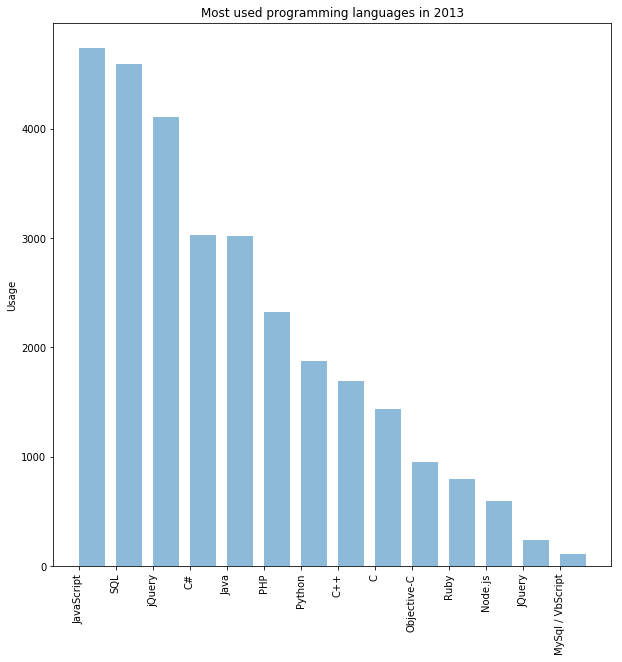

In [14]:
#Plot the data into a bar chart using the helper function.
#Use the help(hlpr.plot_barchart_dictionary) to know more about the parameters.
hlpr.plot_barchart_dictionary(df_2013['Programming Language'], df_2013['Users Count'],
                              90,'Usage','Most used programming languages in 2013',10,10)

## 2014 dataset
This one is exactly the same as the 2013 dataset in terms of structure and cleaning.

Programming Language  Users Count
0            JavaScript         3783
1                   SQL         3467
2                  Java         2479
3                    C#         2378
4                   PHP         1710
5                Python         1473
6                   C++         1418
7                     C         1174
8           Objective-C          675
9               Node.js          641
10                 Ruby          593
11         oracle plsql           69

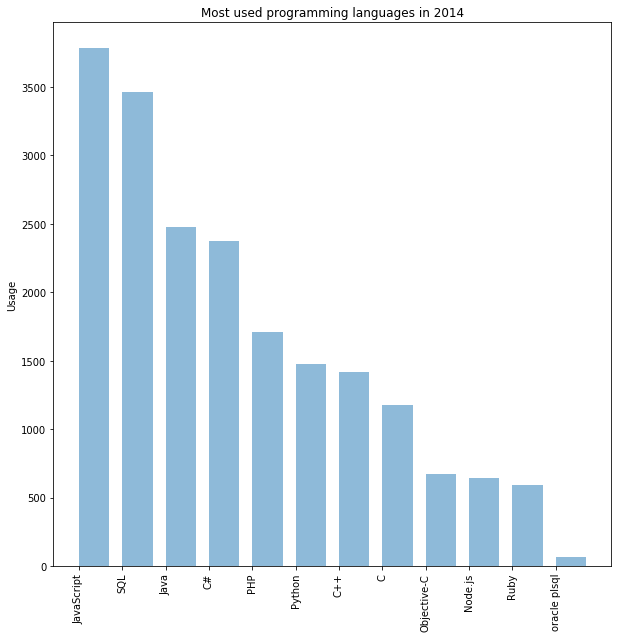

In [15]:
#A closer look on the unprepared dataset of 2014 columns reveals the same problem of the 2013 dataset.
cols_2014 = data_2014.columns.tolist()

pl_2014 = data_2014[[
        'Which of the following languages or technologies have you used significantly in the past year?',
        'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47',
        'Unnamed: 48','Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',
        'Unnamed: 53',]]

pl_2014 = pl_2014[1:]

#Rename every row to the language it represents by taking the first non NaN value in the column and assigning it as a the header.
new_headers_2014 = hlpr.column_rename_firstvalue(pl_2014)
pl_2014.columns = new_headers_2014

#Get the count of each occurence of the language/technology in that column
#and put them into a dictionary to be used later.
pl_2014_counter = {}
pl_2014_counter.fromkeys(new_headers_2014)

for col in pl_2014:
    pl_2014_counter[col]=pl_2014[col].value_counts()[0]


#For the sake of displaying the results in a nice way, we put the dictionary back into a dataframe.
#We also sort the values in descending order to put the most used languages first.
#Lastly, we reset the index to the new sorted order.
df_2014 = pd.DataFrame(list(pl_2014_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2014.reset_index(drop=True,inplace=True)
display(df_2014)
 
#Plot the data into a bar chart using the helper function.
#Use the help(hlpr.plot_barchart_dictionary) to know more about the parameters.
hlpr.plot_barchart_dictionary(df_2014['Programming Language'], df_2014['Users Count'],
                              90,'Usage','Most used programming languages in 2014',10,10)


## 2015 dataset
This time, the fist row in 2015 is useless so, a different type of preparation is required.

In [16]:
#Let's take a look to better understand the nature of this dataset structure.
data_2015.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2      Unnamed: 3  \
0    Country        Age     Gender  Tabs or Spaces   
1    Croatia      25-29       Male            Tabs   
2     France      20-24       Male          Spaces   
3      India      20-24       Male            Tabs   
4     Latvia      25-29       Male      It depends   

                          Unnamed: 4              Unnamed: 5  \
0  Years IT / Programming Experience              Occupation   
1                        2 - 5 years  Back-end web developer   
2                        1 - 2 years  Back-end web developer   
3                        1 - 2 years  Back-end web developer   
4                       6 - 10 years  Back-end web developer   

                 Unnamed: 6                          Unnamed: 7  \
0  Desktop Operating System  Desktop Operating System: write-in   
1                    Ubuntu                                 NaN   
2                 Windows 7                                 NaN   
3                 Windows 7                                 NaN   
4                    Ubuntu                                 NaN   

          Select all that apply                    Unnamed: 9  \
0  Current Lang & Tech: Android  Current Lang & Tech: Arduino   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

                     ...                     \
0                    ...                      
1                    ...                      
2                    ...                      
3                    ...                      
4                    ...                      

                                        Unnamed: 212  \
0  Why use Stack Overflow: I don't use Stack Over...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     Unnamed: 213  \
0  How often are Stack Overflow's answers helpful   
1                                         Usually   
2                                         Usually   
3                                          Rarely   
4                                         Usually   

                      Select all that apply.7  \
0       Why answer: Help a programmer in need   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4  It feels good to help a programmer in need   

                                        Unnamed: 215  \
0                Why answer: Help future programmers   
1                                                NaN   
2  My answer will help lots of people who have th...   
3                                                NaN   
4  My answer will help lots of people who have th...   

                                 Unnamed: 216  \
0           Why answer: Demonstrate expertise   
1  It feels good to demonstrate my expertise.   
2  It feels good to demonstrate my expertise.   
3                                         NaN   
4  It feels good to demonstrate my expertise.   

                                 Unnamed: 217  \
0                  Why answer: Self promotion   
1  Demonstrating my expertise will benefit me   
2                                         NaN   
3  Demonstrating my expertise will benefit me   
4  Demonstrating my expertise will benefit me   

                                        Unnamed: 218         Unnamed: 219  \
0  Why answer: Sense of responsibility to developers  Why answer: No idea   
1  I feel a sense of responsibility to the develo...                  NaN   
2                                                NaN                  NaN   
3                            

Notice that the first row is useless, we only need the next row to be our headers row as each entry is a language/technology.

In [17]:
#Let the first row become the new headers for each column.
data_2015.columns = data_2015.iloc[0]

#We only need those columns from the dataset, the rest has no use for our questions.
pl_2015 = data_2015[['Current Lang & Tech: Android', 'Current Lang & Tech: Arduino',
                     'Current Lang & Tech: AngularJS','Current Lang & Tech: C',
                     'Current Lang & Tech: C++','Current Lang & Tech: C++11',
                     'Current Lang & Tech: C#','Current Lang & Tech: Cassandra',
                     'Current Lang & Tech: CoffeeScript','Current Lang & Tech: Cordova',
                     'Current Lang & Tech: Clojure','Current Lang & Tech: Cloud',
                     'Current Lang & Tech: Dart','Current Lang & Tech: F#','Current Lang & Tech: Go',
                     'Current Lang & Tech: Hadoop','Current Lang & Tech: Haskell','Current Lang & Tech: iOS','Current Lang & Tech: Java',
                     'Current Lang & Tech: JavaScript',
                     'Current Lang & Tech: LAMP',
                     'Current Lang & Tech: Matlab',
                     'Current Lang & Tech: MongoDB',
                     'Current Lang & Tech: Node.js',
                     'Current Lang & Tech: Objective-C',
                     'Current Lang & Tech: Perl',
                     'Current Lang & Tech: PHP',
                     'Current Lang & Tech: Python',
                     'Current Lang & Tech: R',
                     'Current Lang & Tech: Redis',
                     'Current Lang & Tech: Ruby',
                     'Current Lang & Tech: Rust',
                     'Current Lang & Tech: Salesforce',
                     'Current Lang & Tech: Scala',
                     'Current Lang & Tech: Sharepoint',
                     'Current Lang & Tech: Spark',
                     'Current Lang & Tech: SQL',
                     'Current Lang & Tech: SQL Server',
                     'Current Lang & Tech: Swift',
                     'Current Lang & Tech: Visual Basic',
                     'Current Lang & Tech: Windows Phone',
                     'Current Lang & Tech: Wordpress',
                     'Current Lang & Tech: Write-In',]]
#Rename each column in the dataframe with the first valid value from that column.
pl_2015 = pl_2015[1:]
new_headers_2015 = hlpr.column_rename_firstvalue(pl_2015)
pl_2015.columns = new_headers_2015

In [18]:
#Get the count of the occurence of each language.
pl_2015_counter = {}
pl_2015_counter.fromkeys(new_headers_2015)

for col in pl_2015:
    pl_2015_counter[col]=pl_2015[col].value_counts()[0]

#For the sake of displaying the results in a nice way, we put the dictionary back into a dataframe.
#We also sort the values in descending order to put the most used languages first.
#Lastly, we reset the index to the new sorted order.
df_2015 = pd.DataFrame(list(pl_2015_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2015.reset_index(drop=True,inplace=True)
display(df_2015)

Programming Language  Users Count
0                      JavaScript        11962
1                             SQL         9439
2                            Java         8219
3                              C#         6949
4                             PHP         6529
5                          Python         5238
6                             C++         4529
7                      SQL Server         4129
8                         Android         4110
9                               C         3612
10                        Node.js         2919
11                      AngularJS         2913
12                      Wordpress         2007
13                            iOS         1956
14                           LAMP         1926
15                          C++11         1851
16                           Ruby         1765
17                        MongoDB         1745
18                    Objective-C         1719
19                   Visual Basic         1701
20         Arduino / Raspberry Pi         1626
21  Cloud (AWS, GAE, Azure, etc.)         1410
22                          Redis          873
23                         Matlab          860
24                   CoffeeScript          783
25                          Swift          759
26                              R          755
27                           Perl          738
28                        Cordova          628
29                  Windows Phone          570
30                          Scala          538
31                             Go          462
32                        Haskell          357
33                     Sharepoint          349
34                         Hadoop          342
35                      Cassandra          202
36                        Clojure          176
37                             F#          174
38                     Salesforce          153
39                           Dart          109
40                          Spark          104
41                           Rust          103
42                            lua           79

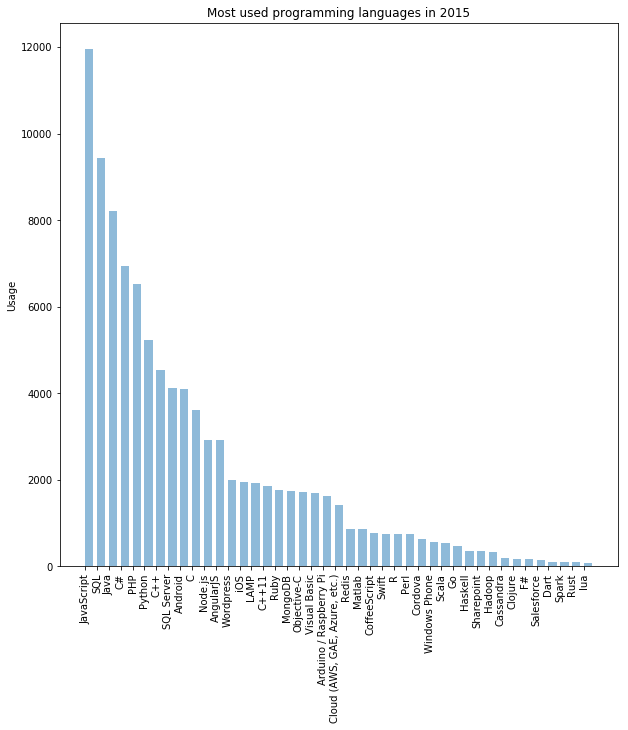

In [19]:
#Plot the data into a bar chart using the helper function.
#Use the help(hlpr.plot_barchart_dictionary) to know more about the parameters.
hlpr.plot_barchart_dictionary(df_2015['Programming Language'], df_2015['Users Count'],
                              90,'Usage','Most used programming languages in 2015',10,10)

## 2016 dataset
2016 dataset is a much simpler one with little cleaning to do.

In [20]:
#Take a look at the 2016 dataframe columns.
data_2016.head()

Unnamed: 0 collector      country   un_subregion     so_region age_range  \
0        1888  Facebook  Afghanistan  Southern Asia  Central Asia     20-24   
1        4637  Facebook  Afghanistan  Southern Asia  Central Asia     30-34   
2       11164  Facebook  Afghanistan  Southern Asia  Central Asia       NaN   
3       21378  Facebook  Afghanistan  Southern Asia  Central Asia       NaN   
4       30280  Facebook  Afghanistan  Southern Asia  Central Asia      > 60   

   age_midpoint                  gender  \
0          22.0                    Male   
1          32.0                    Male   
2           NaN                     NaN   
3           NaN                  Female   
4          65.0  Prefer not to disclose   

                                 self_identification              occupation  \
0                                         Programmer                     NaN   
1                    Developer; Engineer; Programmer  Mobile developer - iOS   
2                                                NaN                     NaN   
3                                           Engineer                  DevOps   
4  Developer; Engineer; Programmer; Sr. Developer...                     NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

            important_sameend           important_newtech  \
0                         NaN                         NaN   
1  This is somewhat important      This is very important   
2                         NaN                         NaN   
3     I don't care about this  This is somewhat important   
4                         NaN                         NaN   

       important_buildnew  important_buildexisting  \
0                     NaN                      NaN   
1  This is very important  I don't care about this   
2                     NaN                      NaN   
3  This is very important   This is very important   
4                     NaN                      NaN   

          important_promotion    important_companymission  \
0                         NaN                         NaN   
1  This is somewhat important  This is somewhat important   
2                         NaN                         NaN   
3     I don't care about this     I don't care about this   
4                         NaN                         NaN   

             important_wfh         important_ownoffice  \
0                      NaN                         NaN   
1  I don't care about this     I don't care about this   
2                      NaN                         NaN   
3   This is very important  This is somewhat important   
4                      NaN                         NaN   

                                developer_challenges  \
0                                                NaN   
1  Unrealistic expectations; Interacting with non...   
2                                                NaN   
3  Corporate policies; Interacting with non-techn...   
4                                                NaN   

                                  why_stack_overflow  
0                                                NaN  
1  To get help for my job; Because I can't do my ...  
2                                                NaN  
3   To get help for my job; Beacause I love to learn  
4                                                NaN  

[5 rows x 66 columns]

We only need the "tech_do" column, so we will isolate it, count the occurence of each programming language or technology.

In [21]:
#Take the "tech_do" column into a dataframe.
pl_2016 = data_2016['tech_do']

#drop nan values as they are not needed since we only care about the count of occurence of each technology.
pl_2016.dropna(inplace=True)

In [22]:
#Getting the count of each technology.
pl_2016_counter = defaultdict(int)
for st in pl_2016:
    row = st.split(';')
    for subst in row:
        pl_2016_counter[subst.strip()]+=1 
#The above line is very intriguing, isn't it ?

Why was the .strip() used in the above code ?
Well, after counting the occurence of each technology in the column "tech_do", I noticed some duplicate entries that causes inaccurate data to be displayed.
After analysing this, it turns out some entries are repeated but preceeded with a white space.
Hence, we use .strip() to remove leading and trailing white space.

In [23]:
#To demonstrate the issue, let's check this out.
for st in pl_2016:
    row = st.split(';')
    for subst in row:
        print(subst)

iOS
 Objective-C
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 Cassandra
 CoffeeScript
 Cordova
 Clojure
 Cloud (AWS, GAE, Azure, etc.)
 Dart
 F#
 Go
 Hadoop
 Haskell
 iOS
 Java
 JavaScript
 LAMP
 Matlab
 MongoDB
 Node.js
 Objective-C
 Perl
 PHP
 Python
 R
 ReactJS
 Redis
 Ruby
 Rust
 Salesforce
 Scala
 SharePoint
 Spark
 SQL
 SQL Server
 Swift
 Visual Basic
 Windows Phone
 WordPress
JavaScript
 PHP
 SQL
 WordPress
PHP
Arduino / Raspberry Pi
 C
 C++
 Java
 JavaScript
 LAMP
 PHP
 SQL
Android
 Cordova
 MongoDB
 PHP
 SQL
 WordPress
C#
 Dart
 Java
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 Visual Basic
 WordPress
Java
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
Android
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Python
 SQL Server
SQL
Ruby
C
 C++
 JavaScript
 PHP
 Python
C
 C#
 PHP
 SQL
LAMP
 PHP
 SQL
JavaScript
Java
 PHP
 WordPress
C
 Java
AngularJS
 JavaScript
 Spark
PHP
C#
 Visual Basic
AngularJS
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Haskell
 JavaScript
 MongoDB
 Node.js
 PHP
 Py

Java
Android
 C
 C++
 C#
 Clojure
 Go
 Haskell
 Java
 Matlab
 Python
 ReactJS
 Rust
 Scala
 SQL
Android
 AngularJS
 C
 C#
 Haskell
 Java
 JavaScript
 LAMP
 Matlab
 Node.js
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 C
 C++
 Java
 Python
C++
 Java
 JavaScript
AngularJS
 Cassandra
 Cordova
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 WordPress
Arduino / Raspberry Pi
 C
 C++
 Java
 JavaScript
 PHP
 SQL
C
 Java
 Python
 SQL
Android
 AngularJS
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 JavaScript
 MongoDB
 Node.js
 SQL
C#
 JavaScript
 Python
 Ruby
AngularJS
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Ruby
 SQL
C++
 iOS
 LAMP
 PHP
 Python
 SQL
 Swift
Arduino / Raspberry Pi
 C#
 JavaScript
 SQL
 SQL Server
 Windows Phone
Arduino / Raspberry Pi
 AngularJS
 C++
 C#
 Java
 JavaScript
 Node.js
 Python
PHP
Android
 PHP
Android
 Arduino / Raspberry Pi
 AngularJS
 CoffeeScript
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Redis
 SQL
C#
 J

Java
 JavaScript
 SQL
 SQL Server
JavaScript
 LAMP
 Node.js
 PHP
 SQL
Ruby
Android
 SQL
Android
 Arduino / Raspberry Pi
 C
 C#
 Go
 Java
 JavaScript
 Node.js
 Ruby
 SQL
JavaScript
 Python
 WordPress
C#
 JavaScript
 MongoDB
 SQL
 SQL Server
 Windows Phone
SQL
AngularJS
 Haskell
 JavaScript
 MongoDB
 Node.js
 Python
 SQL
C#
 JavaScript
 Ruby
C
 C++
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 JavaScript
 LAMP
 Objective-C
 Perl
 PHP
 Python
 Ruby
 SQL
 SQL Server
 WordPress
PHP
 SQL
 Visual Basic
AngularJS
 C#
 Java
 JavaScript
 SQL
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 SQL Server
Android
 C#
 Java
 JavaScript
 SQL
 Visual Basic
Java
 JavaScript
 Python
 Scala
 SQL
Android
 C#
 Java
 JavaScript
 MongoDB
 Redis
 SQL
 SQL Server
Arduino / Raspberry Pi
 AngularJS
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Python
 Redis
 SQL
SQL
 SQL Server
JavaScript
 Node.js
 ReactJS
 SQL
 SQL Server
AngularJS
 Java
 JavaScript
 SQL
JavaScript
 Redis
 Ruby
AngularJS
 C#

 JavaScript
AngularJS
 Java
 JavaScript
 PHP
 SQL
JavaScript
 PHP
Android
 Java
JavaScript
Arduino / Raspberry Pi
 C++
 C#
 Java
 JavaScript
 Python
 SQL
AngularJS
 C++
 PHP
 SQL
 WordPress
Java
Arduino / Raspberry Pi
 C#
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
C
 C++
 Java
 Matlab
 Objective-C
 Visual Basic
 Windows Phone
C
 WordPress
C#
 F#
 JavaScript
 SharePoint
 SQL
 SQL Server
SQL
C++
 PHP
 Python
 SQL
C++
 C#
 SQL
Android
 iOS
 Objective-C
 Python
C++
 C#
 Java
 JavaScript
 Node.js
 SharePoint
 SQL
 SQL Server
Android
 Java
 SQL
Arduino / Raspberry Pi
 C
 C++
 SQL
C#
 Java
 JavaScript
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
AngularJS
 C#
 MongoDB
 Node.js
 Python
 SQL Server
CoffeeScript
 JavaScript
 PHP
 SQL
JavaScript
 PHP
Arduino / Raspberry Pi
 AngularJS
 C
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Haskell
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 R
 ReactJS
 Redis
 SQL
C++
 Java
 Perl
AngularJS
 Java
 JavaScript
 Node.js
 ReactJS

 SQL
Android
 C
 Java
 JavaScript
 PHP
 WordPress
JavaScript
 PHP
 ReactJS
 WordPress
Node.js
 PHP
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Go
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 SQL
Java
 JavaScript
 SQL
AngularJS
 Cordova
 Java
 JavaScript
 SQL
 SQL Server
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Scala
Go
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 WordPress
AngularJS
 JavaScript
 MongoDB
 Node.js
AngularJS
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Go
 JavaScript
 MongoDB
 Node.js
Android
 AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
AngularJS
 JavaScript
 PHP
 WordPress
C
 C++
 C#
 Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 F#
 Hadoop
 Java
 Matlab
 MongoDB
 Node.js
 PHP
 Python
 R
 Salesforce
 Scala
 SharePoint
 Spark
 SQL
C++
 iOS
 Objective-C
C
 Python
JavaScript
AngularJS
 C#
 JavaScript
JavaScript
 LAMP
 PHP
 SQL
LAMP
 PHP
 SQL
CoffeeScript
 JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
 Redis
 SQL
Android
 Go
 MongoDB
 Redis
AngularJS
 Ja

Java
 Python
C
 C++
 C#
C++
 Java
 JavaScript
 PHP
 Python
 Ruby
 SQL
AngularJS
 JavaScript
Arduino / Raspberry Pi
 C
 JavaScript
 PHP
 SQL
Arduino / Raspberry Pi
 JavaScript
 Perl
 SQL
C
 C++
 C#
AngularJS
 Java
 JavaScript
 MongoDB
 Redis
 SQL
JavaScript
 MongoDB
 Node.js
Android
 AngularJS
 Cordova
 iOS
 Java
 JavaScript
 PHP
 SQL
 Swift
 WordPress
JavaScript
 PHP
 Ruby
 SQL
CoffeeScript
 JavaScript
 PHP
 SQL
Android
 C
 C++
 JavaScript
 Python
 Scala
 Spark
 Swift
Java
 JavaScript
 Node.js
 PHP
 Python
 Ruby
 SQL
 SQL Server
Java
 JavaScript
 Node.js
AngularJS
 Go
 Python
 Redis
Go
 Hadoop
 Java
 JavaScript
 Matlab
 PHP
 Python
 Redis
 Scala
 Spark
 SQL
Android
 Arduino / Raspberry Pi
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Windows Phone
Cordova
 JavaScript
 Node.js
 PHP
JavaScript
 Node.js
 PHP
 Ruby
Android
 C
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 WordPress
JavaScript
 PHP
 Ruby
 SQL
JavaScript
 MongoDB
C#
JavaScript
 PHP
Arduino / Raspberry Pi
 LAMP
 Matlab


 Swift
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
JavaScript
 PHP
 WordPress
C++
 C#
C
 C++
Android
 Java
 Python
C#
 JavaScript
 PHP
 SQL
 Visual Basic
R
JavaScript
 Python
 SQL
Android
 Arduino / Raspberry Pi
 C++
 Java
 JavaScript
 PHP
 Python
 Ruby
 SQL
 WordPress
Arduino / Raspberry Pi
 C
 C++
 C#
 iOS
 Java
 JavaScript
 Objective-C
 SQL
C++
 iOS
 Python
Android
 C#
 Java
 LAMP
 PHP
 SQL
C++
 Python
Android
 iOS
 Java
 Swift
AngularJS
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 Scala
 SQL
 WordPress
Android
 AngularJS
 CoffeeScript
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
AngularJS
 JavaScript
 MongoDB
 Node.js
 PHP
 SQL
Android
 C++
 C#
 JavaScript
 PHP
 SQL
 Windows Phone
Android
 Arduino / Raspberry Pi
 iOS
 JavaScript
 LAMP
 Node.js
 Objective-C
 PHP
 WordPress
Java
 Python
 R
 SQL
JavaScript
 PHP
 SQL
Android
 iOS
 Java
 JavaScript
 Objective-C
 SQL
Android
 Java
 Node.js
 PHP
 SQL


 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 R
 Swift
WordPress
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 iOS
 Java
 JavaScript
 Objective-C
 PHP
 SQL
 SQL Server
 Windows Phone
 WordPress
Android
 Go
 iOS
 Java
 Objective-C
C++
 C#
 Java
 JavaScript
 SQL
Android
 iOS
 JavaScript
 Node.js
 Objective-C
 Ruby
 SQL
JavaScript
CoffeeScript
 Go
 JavaScript
 ReactJS
 Redis
 Ruby
 Scala
 Spark
 SQL
Android
 JavaScript
 PHP
 SQL
 WordPress
AngularJS
 iOS
 JavaScript
 LAMP
 PHP
 SQL
 Swift
 WordPress
JavaScript
 PHP
Arduino / Raspberry Pi
 C#
 JavaScript
 SQL
 SQL Server
Android
 AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
 WordPress
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 PHP
Java
 Python
 SQL
C#
 PHP
 Redis
 SharePoint
Android
 Arduino / Raspberry Pi
 Java
 PHP
 Visual Basic
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Windows Phone
Java
PHP
AngularJS
 JavaScript
Java
 SQL
 WordPress
Node.js
 PHP
 Redis
Android
 C
 C++
 Java
JavaS

 AngularJS
 C++
 JavaScript
 MongoDB
 Node.js
 Python
 Redis
AngularJS
 JavaScript
 Node.js
 PHP
 Redis
 SQL
Arduino / Raspberry Pi
 AngularJS
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 SharePoint
 Swift
 Windows Phone
Java
 Python
 SQL
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 Python
 Redis
 SQL
Java
 Perl
 SQL
AngularJS
 Java
 JavaScript
 Node.js
 ReactJS
 Scala
 SQL
Java
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
Java
 Matlab
 Python
PHP
 SQL
Android
 C
 C++
 Haskell
 Java
 JavaScript
 SQL Server
 Visual Basic
C++
 PHP
 Python
 SQL
C
 Java
 JavaScript
 R
 SQL
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 JavaScript
 Node.js
 SQL
 SQL Server
JavaScript
 PHP
 Ruby
 SQL
C
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
AngularJS
 Java
 JavaScript
 Python
C
 C++
 C#
 JavaScript
 PHP
 Python
 SQL
C
 C++
 C#
 Haskell
 Java
 JavaScript
JavaScript
 PHP


Matlab
Java
 JavaScript
 PHP
 Python
 SQL
C
 iOS
AngularJS
 Python
 ReactJS
 Redis
C#
 JavaScript
 PHP
 Python
 Ruby
 SQL
C#
 SQL Server
 Windows Phone
PHP
 SQL Server
C++
 Java
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 JavaScript
 LAMP
 PHP
 SQL
C
 Python
Cloud (AWS, GAE, Azure, etc.)
 PHP
iOS
 Swift
C++
 C#
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
JavaScript
 PHP
 SQL
 Visual Basic
JavaScript
 LAMP
 PHP
 SQL
Android
 C
 C++
 C#
 Go
 Hadoop
 Java
 JavaScript
 LAMP
 Matlab
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
 WordPress
AngularJS
 iOS
 Python
 ReactJS
 Swift
 WordPress
JavaScript
 PHP
 SQL
Android
 Java
 JavaScript
Java
 SQL
JavaScript
 PHP
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 Redis
Android
 C++
 C#
 Cordova
 F#
 Hadoop
 iOS
 JavaScript
 MongoDB
 Node.js
 PHP
 SQL
 SQL Server
 Windows Phone
C
 Java
C
 C++
 C#
 Java
 JavaScript
 SQL
JavaScript
 LAMP
 PHP
JavaScript
 Ruby
AngularJS
 JavaScript
 Node.js
 Perl
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Ja

 Python
 R
 SQL
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 WordPress
Java
 JavaScript
 SQL
C#
 Java
 JavaScript
 SQL
Java
 JavaScript
 PHP
 Redis
 Ruby
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C#
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 Objective-C
 PHP
 SQL
 Swift
 Visual Basic
C
 Java
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
 SQL Server
 WordPress
C
AngularJS
 JavaScript
 LAMP
 PHP
 SQL
JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
Android
 Arduino / Raspberry Pi
 C
 C++
 Hadoop
 Haskell
 Java
 JavaScript
 LAMP
 PHP
 Python
 R
 SQL
CoffeeScript
 Clojure
 Go
 Java
 JavaScript
 Node.js
 Python
AngularJS
 iOS
 JavaScript
 ReactJS
 Scala
 Swift
Android
 C#
 iOS
 SQL
C
 C++
 Python
C
 Clojure
 Ruby
C#
 JavaScript
 SQL Server
C++
 Objective-C
iOS
 JavaScript
 Objective-C
 PHP
 Scala
 Swift
Android
 C
 JavaScript
 Python
Android
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 ReactJS
AngularJS
 Java
 JavaScript
 M

C#
 JavaScript
 SQL
Arduino / Raspberry Pi
 C
 Cordova
 F#
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
 Visual Basic
 WordPress
AngularJS
 Java
 JavaScript
AngularJS
 PHP
Android
 C#
 JavaScript
 PHP
 Python
 SQL
 SQL Server
JavaScript
 Python
Android
 iOS
 Java
 JavaScript
 Objective-C
 Swift
Java
 JavaScript
 SQL
AngularJS
 JavaScript
 SQL
AngularJS
 C#
 JavaScript
 Scala
C#
 SQL Server
Android
 AngularJS
 C#
 Cordova
 JavaScript
 Node.js
 SQL
AngularJS
 Cordova
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
 WordPress
Java
 JavaScript
 Python
 SQL
C++
 Java
 Python
Java
 Matlab
 R
Android
 Arduino / Raspberry Pi
 AngularJS
 C++
 Java
 JavaScript
 PHP
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
Arduino / Raspberry Pi
 C++
 C#
 Visual Basic
C
 C++
 Java
C#
 Cloud (AWS, GAE, Azure, etc.)
 Windows Phone
Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Java
 Scala
 Spark
Arduino / Raspberry Pi
 C
 C++
 Cordova
 iOS
 JavaScript
 Node.js
 Objective-C
 PHP
 SQL
 Swift
 WordP

 SQL
Android
 C++
 Go
 iOS
 MongoDB
 Objective-C
 Python
 Swift
CoffeeScript
 Clojure
 Java
 JavaScript
 SQL
C
 C++
 SQL
Android
 AngularJS
 iOS
 Java
 JavaScript
 MongoDB
 SQL
 Swift
 WordPress
AngularJS
 C#
 JavaScript
 SQL Server
C++
 Ruby
 Swift
 Visual Basic
Java
 SQL
C
 Java
 JavaScript
 LAMP
 Matlab
 PHP
 SQL
Ruby
C#
 Java
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SQL
C
 C#
 Java
 JavaScript
 R
 ReactJS
 SQL
 SQL Server
 Windows Phone
AngularJS
 Java
 JavaScript
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 LAMP
 Matlab
 PHP
 Python
 Ruby
 SQL
 Visual Basic
 Windows Phone
iOS
 Objective-C
 WordPress
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 SQL
 SQL Server
 Windows Phone
AngularJS
 JavaScript
 PHP
 ReactJS
 SQL
 WordPress
Android
 Arduino / Raspberry Pi
 C#
 iOS
 Java
 JavaScript
 Matlab
 Objective-C
 Python
 WordPress
iOS
 Objective-C
 Python
 Swift
Android
 AngularJS
 CoffeeScript
 JavaScript
 Node.js

 Objective-C
 Swift
Android
 Cordova
 iOS
 JavaScript
 Node.js
 SQL
AngularJS
 C#
 JavaScript
 Objective-C
Arduino / Raspberry Pi
 JavaScript
 LAMP
 PHP
 Python
 SQL
C#
Java
 JavaScript
 LAMP
 Node.js
 PHP
C#
 Python
Android
 Arduino / Raspberry Pi
 C#
 Java
 JavaScript
 PHP
 SQL
 WordPress
C++
 Ruby
C#
 Java
 JavaScript
 Node.js
 Python
C#
 JavaScript
 ReactJS
Arduino / Raspberry Pi
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 Windows Phone
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
 SQL Server
C
 C#
AngularJS
 JavaScript
 Node.js
 Python
 R
 ReactJS
 Ruby
 Visual Basic
 WordPress
C#
 JavaScript
 SQL Server
 Visual Basic
Java
 SQL
iOS
 JavaScript
 Node.js
 PHP
 Redis
 SQL
 SQL Server
C
 C++
 Haskell
 Matlab
 Python
 SQL
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 Scala
Android
 C++
 iOS
 Java
 Objective-C
 PHP
 SQL
 Swift
Java
 JavaScript
 PHP
 WordPress
C++
 C#
 JavaScript
 ReactJS
 SharePoint
 SQL
Android
 AngularJS
 JavaS

C#
 JavaScript
JavaScript
 PHP
JavaScript
 PHP
 Python
 ReactJS
AngularJS
 JavaScript
 LAMP
 MongoDB
 PHP
 SQL
 WordPress
Android
 Arduino / Raspberry Pi
 Java
 Scala
JavaScript
 PHP
 Ruby
 WordPress
AngularJS
 C#
 iOS
 JavaScript
 Node.js
 SQL
AngularJS
 JavaScript
 PHP
R
 SQL
Android
 AngularJS
 Cordova
 JavaScript
 PHP
 SQL
 WordPress
Java
JavaScript
 MongoDB
 PHP
 WordPress
AngularJS
 JavaScript
 Node.js
C#
 JavaScript
 SQL Server
PHP
AngularJS
 JavaScript
 PHP
 SQL
JavaScript
 PHP
 SQL
C
 C++
JavaScript
 Node.js
 PHP
 ReactJS
 Windows Phone
 WordPress
C++
 Python
 SQL
JavaScript
 MongoDB
 PHP
 SQL
 WordPress
Arduino / Raspberry Pi
 Java
 JavaScript
 MongoDB
 Python
 Scala
C
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
 Windows Phone
iOS
 Objective-C
 PHP
 Python
 SQL
 Swift
Java
iOS
 PHP
 Swift
C#
 JavaScript
 MongoDB
 Node.js
Android
 Java
 JavaScript
 Node.js
 PHP
 SQL
 WordPress
JavaScript
 PHP
 SQL
 WordPress
iOS
 Objective-C
Java
 SQL
Android
 AngularJS
 C#


 MongoDB
 Node.js
 Spark
C#
 JavaScript
 PHP
Java
 JavaScript
 Python
 ReactJS
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
iOS
 Objective-C
 PHP
 Swift
 WordPress
Objective-C
 Ruby
Android
 C#
 Java
 JavaScript
 Node.js
 PHP
 SQL
 SQL Server
 Visual Basic
Java
 SQL
 Swift
AngularJS
 JavaScript
 Salesforce
Ruby
Java
AngularJS
 C#
 JavaScript
 Node.js
 ReactJS
Android
 C
 C++
 C#
 Java
 JavaScript
 SQL
C++
 JavaScript
Android
 iOS
 Java
 JavaScript
C
 C++
 Java
 Python
Android
 C
 Java
Android
 Java
 Ruby
 Rust
 SQL
JavaScript
 WordPress
Android
 C++
 C#
 CoffeeScript
 Java
 JavaScript
 Node.js
 Perl
 PHP
 Python
 ReactJS
 Ruby
 SQL Server
 Visual Basic
 WordPress
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 Ruby
 Scala
 Spark
 SQL
Android
 C#
 Java
 Node.js
C++
 C#
Android
 AngularJS
 iOS
 Java
 JavaScript
 ReactJS
 SQL
 Swift
C
 C++
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 PHP
AngularJS
 Cloud (AWS, GA

 Python
 R
 SQL
JavaScript
 LAMP
 PHP
 SQL
 WordPress
AngularJS
 Java
 JavaScript
C++
 Python
C++
 JavaScript
JavaScript
 LAMP
 PHP
 SQL
 WordPress
JavaScript
 PHP
 SQL
 WordPress
Java
 JavaScript
Arduino / Raspberry Pi
 Cloud (AWS, GAE, Azure, etc.)
 LAMP
 Python
 Ruby
Java
AngularJS
 JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
 Ruby
C++
JavaScript
 PHP
C
 Java
 Matlab
 PHP
 Visual Basic
Android
 C++
 C#
 iOS
 R
C
 C++
 Go
 JavaScript
 Node.js
 Perl
 PHP
 Python
 ReactJS
 Redis
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Java
AngularJS
 JavaScript
 PHP
 SQL
 WordPress
Android
 Java
C++
 JavaScript
 Node.js
 ReactJS
C#
 Matlab
C
 Java
 Scala
JavaScript
 PHP
 SQL
 WordPress
C++
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 SQL
Android
 Java
 JavaScript
 Windows Phone
 WordPress
Node.js
 PHP
 Redis
Java
 JavaScript
 SQL
 Visual Basic
Android
 SQL
C
 C++
 C#
 Java
C#
JavaScript
 PHP
 SQL
JavaScript
 MongoDB
 SQL
 SQL Server
 WordPress
AngularJS
 Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 

SQL
C++
C
 CoffeeScript
 Clojure
 Go
 iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 Python
 Redis
 Ruby
 Scala
 SQL
 Swift
JavaScript
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 Redis
LAMP
 PHP
AngularJS
 Hadoop
 JavaScript
 MongoDB
 Python
 Redis
 SQL
Android
 AngularJS
 Go
 Python
 Redis
C#
 JavaScript
 SQL Server
AngularJS
 JavaScript
 Node.js
 PHP
 Python
 ReactJS
 Ruby
 SQL
SQL
 SQL Server
 Visual Basic
Java
Visual Basic
JavaScript
 Node.js
 Ruby
Android
 iOS
 JavaScript
 Node.js
 ReactJS
 Redis
 Ruby
 Swift
iOS
 Objective-C
 Swift
AngularJS
 JavaScript
 MongoDB
 PHP
 SQL
Java
 Python
 R
Android
 Java
AngularJS
 C#
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
 WordPress
C
 C++
 iOS
 JavaScript
 Node.js
 Objective-C
 Python
 Swift
JavaScript
 Node.js
 PHP
 Redis
 SQL
Android
 AngularJS
 C#
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 PHP
 Python
 ReactJS
C++
 PHP
 Python
Java
 Redis
 Ruby
 SQL
Java
 JavaScript
 PHP
AngularJS
 C++
 C#
 JavaScript
Android
 Arduino /

 SQL
 SQL Server
 Swift
Android
 AngularJS
 Java
 JavaScript
 Node.js
 PHP
 Python
 WordPress
C++
 C#
 Matlab
 Swift
AngularJS
 Cordova
 Clojure
 Go
 JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
 Ruby
 SQL
Android
 C
 C++
 C#
 Java
 PHP
 Visual Basic
C
 C++
 C#
 Java
 Python
C#
 JavaScript
 Visual Basic
Android
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
 SQL
C++
 Python
 SQL
Android
 AngularJS
 Cordova
 JavaScript
 Node.js
JavaScript
 LAMP
 MongoDB
 PHP
 SQL
 WordPress
JavaScript
 PHP
 SQL
 WordPress
iOS
 Java
 JavaScript
 Objective-C
 PHP
 SQL
 Swift
C#
 JavaScript
 SQL
 SQL Server
JavaScript
JavaScript
 Node.js
 ReactJS
PHP
AngularJS
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 SQL
C#
 JavaScript
 PHP
 Python
JavaScript
 LAMP
 PHP
 WordPress
Android
 Arduino / Raspberry Pi
 C
 C#
 F#
 iOS
 Java
 JavaScript
 MongoDB
 PHP
 Python
 Scala
 SQL
 SQL Server
 Swift
 Windows Phone
 WordPress
Matlab
Cordova
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
JavaScript
 WordPress
AngularJS
 C
 Java

 iOS
 Java
 JavaScript
 Node.js
 Objective-C
Android
AngularJS
 JavaScript
 Ruby
Java
Android
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
JavaScript
 LAMP
 ReactJS
C#
 JavaScript
 Matlab
 Node.js
Java
 JavaScript
Java
 SQL
C
 C++
 C#
 PHP
 Spark
 SQL Server
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 Go
 JavaScript
C#
 JavaScript
 Objective-C
 SQL
 Visual Basic
Arduino / Raspberry Pi
 Java
 Python
Android
 AngularJS
 C++
 Go
 Java
 JavaScript
 Python
 SQL
JavaScript
 MongoDB
 Node.js
Android
 Java
 PHP
 R
Android
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 WordPress
C#
 Java
AngularJS
 C
 C++
 C#
 Java
 JavaScript
 PHP
 Ruby
AngularJS
 Java
 Python
Android
 AngularJS
 C#
 JavaScript
 PHP
JavaScript
 Node.js
 ReactJS
Android
 AngularJS
 C
 C++
 Java
 Node.js
 SQL
C#
iOS
 Java
 JavaScript
 PHP
 SQL
Android
 Arduino / Raspberry Pi
 C#
 iOS
 Java
 LAMP
 Objective-C
 PHP
 Python
 SQL
C#
 SQL
 SQL Server
AngularJS
 Ruby
JavaScript
 Node.js
 PHP
 SQL
PHP

 PHP
 Python
Android
 C
 Cassandra
 Java
 JavaScript
 MongoDB
 Node.js
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 Redis
 SQL
Android
 Arduino / Raspberry Pi
 AngularJS
 CoffeeScript
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 SQL
 WordPress
Haskell
 Java
 JavaScript
 Node.js
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 SQL
 Swift
Android
 AngularJS
 C#
 Java
 JavaScript
 Node.js
Arduino / Raspberry Pi
 AngularJS
 Cassandra
 Java
Arduino / Raspberry Pi
 AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 SQL
Android
 Java
 Ruby
AngularJS
 C
 C++
 JavaScript
 MongoDB
 Node.js
 PHP
 SQL
 WordPress
JavaScript
 PHP
 WordPress
C++
 JavaScript
iOS
 Python
PHP
 SQL
 WordPress
JavaScript
 PHP
 Spark
 SQL
C#
 JavaScript
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 Ruby
C#
 JavaScript
 Python
 SQL
C#
 JavaScript
 SQL
 SQL Server
C++
 C#
 SQL
C
 C++
 Java
 Python
 Rust
AngularJ

Android
 iOS
 JavaScript
 PHP
 Ruby
C
 C++
 C#
 Haskell
 Java
 JavaScript
 SQL
 Visual Basic
Android
 Arduino / Raspberry Pi
 AngularJS
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
 SQL Server
 Visual Basic
 Windows Phone
Android
 C#
 Java
Arduino / Raspberry Pi
 AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Python
 Redis
C#
 JavaScript
 SQL Server
C#
 JavaScript
 Node.js
 PHP
 SQL
C
 Cordova
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
 Windows Phone
C#
 Python
 R
 Spark
JavaScript
 Node.js
 Perl
 PHP
 Salesforce
 SQL
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
 SQL Server
 WordPress
C#
 SQL
 SQL Server
Java
 Python
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 Java
 JavaScript
 PHP
 Python
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 JavaScript
Android
 Arduino / Raspberry Pi
 C++
 Java
 JavaScript
 PHP
AngularJS
 C++
 C#
AngularJS
 JavaScript
 PHP
 SQL
 WordPress
Android
 Java


Java
JavaScript
 PHP
 WordPress
C++
 F#
 iOS
 WordPress
C#
 JavaScript
 PHP
 SQL
 Visual Basic
 WordPress
SQL
 SQL Server
AngularJS
 iOS
 JavaScript
 Objective-C
 Ruby
Android
 AngularJS
 iOS
 JavaScript
 MongoDB
 Node.js
 PHP
 SQL
Android
 C++
 Python
Java
 Python
PHP
JavaScript
 LAMP
 PHP
 WordPress
JavaScript
 LAMP
 Node.js
 Perl
 PHP
 Visual Basic
 WordPress
C#
 JavaScript
 Scala
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 Redis
 SQL
 SQL Server
 Windows Phone
Android
 Arduino / Raspberry Pi
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 Swift
 Windows Phone
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
JavaScript
 Node.js
JavaScript
 MongoDB
 Node.js
 PHP
 Python
C#
 JavaScript
JavaScript
 Node.js
Cloud (AWS, GAE, Azure, etc.)
 Python
 SQL
JavaScript
 PHP
 WordPress
JavaScript
 Python
JavaScript
 PHP
 SQL
 WordPress
AngularJS
 JavaScript
 MongoDB
 Node.js
 SQL
 SQL Server
AngularJS
 JavaScript
Arduino / Raspberry Pi
 C#
 JavaScript
 Node.js
 

 Cloud (AWS, GAE, Azure, etc.)
 Go
 Python
 SQL
C#
 JavaScript
CoffeeScript
 JavaScript
 LAMP
 PHP
 Python
 WordPress
C#
 Java
 SQL
Android
 iOS
 Java
 Objective-C
R
AngularJS
 C#
 Java
JavaScript
 Node.js
 Perl
Android
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
AngularJS
 JavaScript
 Python
 SQL
C
 C++
 Java
C#
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
C
 Java
Android
 Arduino / Raspberry Pi
 C
 Cloud (AWS, GAE, Azure, etc.)
 Haskell
 Java
 Node.js
 Perl
iOS
 Objective-C
Clojure
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 Node.js
 SQL
C#
 JavaScript
 SQL Server
JavaScript
 LAMP
 PHP
 SQL
 WordPress
C#
 SQL Server
 Visual Basic
 Windows Phone
Android
 C++
 Java
 JavaScript
 PHP
 Ruby
 SQL Server
JavaScript
 LAMP
 PHP
 SQL
C++
 JavaScript
 PHP
Android
 Java
 JavaScript
 Node.js
 ReactJS
 Ruby
 SQL
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 Cassandra
 Cordova
 Cloud (AWS, GAE, Azure, 

C#
 Matlab
 Python
 R
 SQL
Android
 Arduino / Raspberry Pi
C#
JavaScript
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
AngularJS
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 SQL
 WordPress
Scala
 SQL
 SQL Server
JavaScript
 Node.js
Cassandra
 Hadoop
 Java
 JavaScript
 MongoDB
 Python
CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 Ruby
 SQL
 Swift
JavaScript
 Node.js
C#
 Java
 JavaScript
Haskell
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Ruby
 SQL
 SQL Server
C++
 Java
 PHP
 ReactJS
C
 C++
 Java
 JavaScript
 PHP
 SQL
 Visual Basic
JavaScript
 Ruby
 SQL
AngularJS
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 Python
C
 C++
C
 C++
 Java
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
AngularJS
 C
 C++
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 SQL
 SQL Server
 WordPress
C++
 JavaScript
 Node.js
 Ruby
 WordPress
Android
 Arduino / Raspberry

AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
 WordPress
AngularJS
 C++
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 Ruby
 SQL
C++
 C#
 Perl
C#
 SQL Server
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 Python
 SQL
 SQL Server
Android
 C#
 Java
 Python
AngularJS
 JavaScript
 Node.js
 PHP
 Redis
 SQL
 WordPress
SQL
Android
 C#
 Windows Phone
C#
 Go
 Redis
Android
 AngularJS
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Ruby
 SharePoint
 SQL
 SQL Server
 Visual Basic
 Windows Phone
 WordPress
AngularJS
 JavaScript
 PHP
 WordPress
C#
 SQL
 SQL Server
C++
 C#
 iOS
 Objective-C
 Swift
Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Perl
 Python
 R
AngularJS
 C++
 Java
 JavaScript
 Node.js
 Ruby
C#
C
 C++
 C#
 JavaScript
 SQL
 SQL Server
JavaScript
 LAMP
 PHP
 Salesforce
 SQL
 SQL Server
 Visual Basic
 WordPress
Hadoop
 MongoDB
 Python
 SharePoint
 SQL
 Visual Basic
Cloud (AWS, GAE, Azure, etc.)
 Java
Angul

 Ruby
 SQL
 SQL Server
Cloud (AWS, GAE, Azure, etc.)
 Java
 Scala
 Spark
ReactJS
 Redis
Arduino / Raspberry Pi
 CoffeeScript
 JavaScript
 Perl
 SQL
Java
 JavaScript
 R
 Ruby
 Swift
JavaScript
 PHP
Java
C++
 Perl
 Python
Android
 AngularJS
 JavaScript
 LAMP
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Redis
 Ruby
 SQL
 WordPress
Python
 Ruby
C#
Arduino / Raspberry Pi
 Hadoop
 Java
 Python
 R
 Redis
C
 Python
AngularJS
 Java
 JavaScript
 Node.js
 Ruby
 SQL
 WordPress
C
 Java
 PHP
AngularJS
 CoffeeScript
 JavaScript
 PHP
 Ruby
 SQL
Java
 Perl
 Python
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Scala
Cloud (AWS, GAE, Azure, etc.)
 iOS
 Matlab
 Python
 R
JavaScript
 ReactJS
 Visual Basic
JavaScript
 Node.js
 Ruby
JavaScript
 LAMP
 PHP
 SQL
 Visual Basic
JavaScript
 Python
JavaScript
 LAMP
 Objective-C
 PHP
 Redis
 SQL
C#
 JavaScript
 Redis
 SQL
 SQL Server
 Swift
C#
 JavaScript
 Node.js
 SQL
Android
 C
 Java
 Python
Android
 AngularJS
 Java
 JavaScript
 SQL
And

AngularJS
 C#
 JavaScript
 Node.js
 SQL Server
Hadoop
 Haskell
 Java
 Python
 SQL
Java
 JavaScript
 SQL
Java
 JavaScript
 SQL
C#
 PHP
 SQL
C#
 F#
 JavaScript
 Node.js
 SQL
 SQL Server
JavaScript
 Node.js
 Salesforce
C#
 JavaScript
 Ruby
 SQL Server
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 PHP
 SharePoint
 SQL Server
 WordPress
AngularJS
 Java
 JavaScript
 Ruby
Arduino / Raspberry Pi
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 SharePoint
 Swift
Android
 C++
 iOS
 Java
 Objective-C
 Swift
C#
 Salesforce
 SQL Server
 Visual Basic
JavaScript
 Python
iOS
SQL
AngularJS
 C#
 Node.js
 Python
 SQL
C++
 C#
 Java
AngularJS
 JavaScript
 Node.js
C
 C++
 C#
 Java
JavaScript
 Node.js
 ReactJS
C
 C++
 C#
 iOS
 Java
JavaScript
 PHP
 WordPress
Python
AngularJS
 C++
 C#
 Java
 PHP
JavaScript
 LAMP
 Node.js
 PHP
 SQL
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 Cassandra
 CoffeeScript
 Cordova
 Clojure
 Cloud (AWS, GAE, A

 PHP
 Python
 Ruby
 SQL
 SQL Server
 Visual Basic
C#
 Cordova
 JavaScript
 SharePoint
Android
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
JavaScript
 Ruby
AngularJS
 Java
 JavaScript
 Spark
JavaScript
 Ruby
Java
 JavaScript
 PHP
 SQL
Android
Python
C#
 JavaScript
 PHP
 SQL
 SQL Server
JavaScript
 PHP
Java
C
 C++
 iOS
 Objective-C
Android
 C#
 iOS
 Java
 Python
 SQL
 Swift
C#
 JavaScript
 PHP
 SQL
 SQL Server
C
 JavaScript
 PHP
 SQL
 WordPress
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Java
PHP
Android
 Java
C#
 JavaScript
 SQL Server
C#
 JavaScript
 PHP
 SQL
JavaScript
 LAMP
 PHP
 Python
 SQL
 WordPress
Java
 Scala
Android
 C#
 Cordova
 Java
 JavaScript
 SQL Server
JavaScript
Arduino / Raspberry Pi
 AngularJS
 C#
 Java
 JavaScript
 Node.js
 Ruby
AngularJS
 Java
 JavaScript
 SQL
C
 C++
 iOS
 Objective-C
Android
 C
 C++
 JavaScript
 Matlab
 MongoDB
 Node.js
 Visual Basic
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 SQL
 WordPress
Python
 Redis
 SQL
 WordPress
C#
 JavaS

 Python
C++
 C#
 Java
 JavaScript
 Ruby
 Visual Basic
AngularJS
 C
 C++
 C#
 Java
 JavaScript
 PHP
 Ruby
 SQL
 SQL Server
 Visual Basic
C++
 Java
Arduino / Raspberry Pi
 C
 JavaScript
 Node.js
 Python
JavaScript
 PHP
Java
 JavaScript
 Node.js
 ReactJS
C++
 PHP
 SQL
iOS
 JavaScript
 MongoDB
 Objective-C
 Ruby
 Swift
Java
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 SQL
 SQL Server
C++
Arduino / Raspberry Pi
 C
 Java
JavaScript
 PHP
 SQL
iOS
 JavaScript
 Ruby
AngularJS
 C++
 C#
 JavaScript
 Node.js
Java
Cassandra
 MongoDB
 Redis
 Ruby
 Scala
 Spark
Android
 C
 C++
 C#
 iOS
 Objective-C
Arduino / Raspberry Pi
 JavaScript
 Node.js
 PHP
 ReactJS
 SQL
AngularJS
 C#
 JavaScript
PHP
 SQL
Java
SQL
 Visual Basic
Python
Arduino / Raspberry Pi
 JavaScript
 PHP
 Python
 SQL
C
 C++
 Java
 JavaScript
 SQL
C#
 Perl
 PHP
 SQL
 SQL Server
Arduino / Raspberry Pi
 C#
 JavaScript
 PHP
 SQL
C#
 Cassandra
 Java
 JavaScript
 Spark
 SQL
 SQL Server
Android
 C++
 Java
 JavaScript
 WordPress
Android
 C#
Androi

 Python
 SQL
 WordPress
Android
 C
 C++
 Java
 JavaScript
 Node.js
 PHP
C++
 Python
C#
 JavaScript
Java
 JavaScript
 ReactJS
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 CoffeeScript
 Clojure
 Cloud (AWS, GAE, Azure, etc.)
 F#
 Go
 Hadoop
 Haskell
 Java
 JavaScript
 LAMP
 MongoDB
 Objective-C
 Perl
 Python
 R
 ReactJS
 Redis
 Ruby
 Rust
 Salesforce
 Scala
 SQL
 SQL Server
 Swift
Arduino / Raspberry Pi
 AngularJS
 C
 C++
 CoffeeScript
 Java
 JavaScript
 Node.js
JavaScript
 PHP
C#
C++
C#
 JavaScript
 Python
 SQL
Java
C++
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
 Python
C#
 iOS
 Objective-C
 Swift
Android
 Arduino / Raspberry Pi
 C++
 Java
 Python
 R
 Ruby
C
 C++
 Java
 R
C#
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 C#
 LAMP
 PHP
 SQL
 WordPress
C
 C++
 Python
JavaScript
 LAMP
 PHP
 SQL
 WordPress
Android
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 ReactJS
 Redis
 Swift
AngularJS
 JavaScript
 Node.js
 Python
Android
 C#
 Java
 PHP
C++
 C#
LAMP


 SQL
 Swift
 WordPress
Android
 C#
 Java
 JavaScript
 LAMP
 PHP
 Ruby
 SQL
 SQL Server
 WordPress
Python
C++
Arduino / Raspberry Pi
 C
 C++
 PHP
 Scala
 SQL
Cloud (AWS, GAE, Azure, etc.)
 LAMP
 Python
Android
 Java
 JavaScript
 Perl
 PHP
 Python
C#
 Java
 SQL
 SQL Server
Android
 Java
 SQL
Java
 JavaScript
 SQL
AngularJS
 Python
C#
 JavaScript
AngularJS
 C#
 Cordova
 JavaScript
 Python
 SQL
 SQL Server
JavaScript
 Perl
 SQL
C
 C++
 JavaScript
 Python
Android
 Arduino / Raspberry Pi
 AngularJS
 C#
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Node.js
 PHP
 SQL
 SQL Server
 Swift
 WordPress
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
C#
 MongoDB
Java
 JavaScript
 Node.js
 SQL
C
 C++
 C#
 Java
 JavaScript
 Python
Android
 C++
 Java
 PHP
 Python
 SQL
AngularJS
 JavaScript
 Node.js
iOS
 Objective-C
 Python
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 PHP
 SQL
 SQL Server
 WordPress
Android
 AngularJS
 Java
 JavaScript
 Python
 SQL
Angu

 PHP
 SQL
 SQL Server
 Visual Basic
C#
 SQL
 Visual Basic
C
 C++
 C#
 JavaScript
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 Ruby
C++
 JavaScript
 Node.js
C++
 C#
 JavaScript
 SQL Server
 Visual Basic
Android
 C
 Java
 SQL Server
 WordPress
Android
 Java
 JavaScript
 Python
 ReactJS
C
 C++
 Java
 JavaScript
 Matlab
 Objective-C
 Python
Salesforce
C
 C++
 JavaScript
WordPress
Go
 JavaScript
 LAMP
 PHP
PHP
 SQL
 WordPress
C
 C++
 C#
 Matlab
 PHP
 Python
 SQL Server
 Visual Basic
 Windows Phone
Android
 Java
 JavaScript
 PHP
 Python
 SQL
Android
C#
 JavaScript
 SQL Server
PHP
C
 C#
iOS
 Objective-C
Salesforce
 SQL
SQL Server
C
 iOS
 Objective-C
 Swift
Java
AngularJS
 JavaScript
 LAMP
 Node.js
 PHP
 Redis
 WordPress
Visual Basic
C#
 JavaScript
 Ruby
 SQL
 SQL Server
JavaScript
 PHP
AngularJS
 JavaScript
 MongoDB
Perl
C#
 JavaScript
 Matlab
 MongoDB
 Python
 R
 SQL
 SQL Server
Android
 C
 Java
C
 C++
 SQL
C
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 Visual Basic
AngularJS
 Hadoop


 WordPress
C
 C++
 C#
 iOS
 Java
 JavaScript
 Objective-C
 PHP
 SQL
 Swift
Arduino / Raspberry Pi
 C
 C++
 Java
 JavaScript
 SQL
Android
 C
 C++
 Java
 JavaScript
 PHP
 SQL
 WordPress
C#
 JavaScript
 SQL Server
Android
 iOS
 Java
C
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
AngularJS
 JavaScript
C#
 iOS
 PHP
iOS
 Objective-C
 Swift
C
 C++
Java
Hadoop
 Java
 JavaScript
C
 iOS
 Objective-C
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
MongoDB
 Ruby
JavaScript
 Salesforce
Arduino / Raspberry Pi
 iOS
 Node.js
 Objective-C
 Swift
AngularJS
 JavaScript
 LAMP
 PHP
 WordPress
C
 Java
 JavaScript
 SQL
Java
 JavaScript
Android
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Objective-C
 Python
 Swift
iOS
 Objective-C
 Swift
Android
C#
 SQL
C
 C++
 iOS
 Objective-C
C
 C++
 Java
 JavaScript
 SQL
 SQL Server
JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
Android
 Java
AngularJS
 C
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 Redis
 SQL
Android
 Java
C++
 JavaScript
C
 C++
 Java
 P

 Swift
Android
AngularJS
 C++
 JavaScript
 PHP
 SQL
PHP
 SQL
Android
 C
 C++
 Java
 JavaScript
 Python
 Visual Basic
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
AngularJS
 CoffeeScript
 JavaScript
 Ruby
 SQL
JavaScript
 MongoDB
 PHP
 Python
 Redis
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 SQL
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
JavaScript
 MongoDB
 PHP
 Python
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
Cloud (AWS, GAE, Azure, etc.)
AngularJS
 JavaScript
 Salesforce
AngularJS
 JavaScript
 Node.js
 PHP
C
 C++
SQL
iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 Swift
Android
 Arduino / Raspberry Pi
 AngularJS
 MongoDB
 Python
 R
 Ruby
 Scala
 SQL
JavaScript
 Ruby
AngularJS
 JavaScript
 SharePoint
Java
 JavaScript
 Ruby
 SQL
JavaScript
C#
 JavaScript
 SQL Server
 Visual Basic
Android
 AngularJS
 Cordova
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 Visual Basic
 WordPress
AngularJS
 Java
 JavaScript
 SQL
Python
Java
 JavaScript
 LAMP
 PHP
 SQ

C#
 SQL
C
 C++
 Hadoop
 Java
 JavaScript
 Objective-C
 Python
 SQL
 SQL Server
Java
LAMP
 PHP
 WordPress
C
 C++
 Hadoop
 Java
 Python
 Ruby
Cloud (AWS, GAE, Azure, etc.)
 Java
 MongoDB
 Python
 Redis
Cloud (AWS, GAE, Azure, etc.)
 Java
 MongoDB
 Python
 Redis
C
 C++
Android
 Arduino / Raspberry Pi
 AngularJS
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 Python
 ReactJS
 Ruby
 SQL
 Swift
Android
 C#
 iOS
 JavaScript
 Node.js
 SQL
 SQL Server
 Swift
Cloud (AWS, GAE, Azure, etc.)
 Objective-C
 Python
iOS
 Objective-C
 Swift
Android
 Java
JavaScript
 Python
 ReactJS
 Ruby
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
C#
 Python
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Redis
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 Python
C
 C++
 Python
Android
 AngularJS
 C
 C++
 C#
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 ReactJS
 Redis
 Ruby
 SQL
Android
 C#
 Java
 SQL
C
 C++
 Matlab
 SQL
 SQL Server
C#


 Python
 SQL
AngularJS
 C#
 JavaScript
 SharePoint
 SQL Server
AngularJS
 C#
 JavaScript
 SharePoint
 SQL
Android
 AngularJS
 CoffeeScript
 JavaScript
 PHP
 Python
 WordPress
C
 C++
 C#
 Java
 JavaScript
 Scala
Go
 Java
 JavaScript
 ReactJS
 SQL
AngularJS
 Java
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
C#
 SQL Server
Android
 C#
 Java
 PHP
 SQL
 SQL Server
 WordPress
C#
AngularJS
 C++
 CoffeeScript
 Cordova
 Java
 JavaScript
 Node.js
 Ruby
JavaScript
 ReactJS
JavaScript
 LAMP
 PHP
 SQL
MongoDB
 PHP
 Python
 SQL
Android
 C++
 C#
 Java
CoffeeScript
 Haskell
 JavaScript
 MongoDB
 Python
 Scala
Java
 JavaScript
 Matlab
 Python
 R
C
 C++
 C#
 SQL
 Visual Basic
Android
 Java
 PHP
Java
 JavaScript
 SQL
C#
 JavaScript
 SQL
 SQL Server
Objective-C
 Swift
C
 iOS
 JavaScript
 Objective-C
 PHP
 Python
 SQL
 SQL Server
 Swift
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 Redis
 Ruby
Android
 Java
 

 iOS
 Java
 Objective-C
 Swift
PHP
Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 LAMP
 Objective-C
 PHP
 Swift
 WordPress
JavaScript
 PHP
 SQL
 SQL Server
 WordPress
C++
 JavaScript
CoffeeScript
 JavaScript
 Ruby
 SQL
C#
 SQL Server
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 SQL
 SQL Server
Scala
Android
 C
 C++
 iOS
 Objective-C
 Swift
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 PHP
 SQL
 Visual Basic
 WordPress
JavaScript
 PHP
JavaScript
 PHP
 SQL
 SQL Server
 WordPress
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 Redis
Android
C#
 Java
 JavaScript
 WordPress
JavaScript
 LAMP
 Node.js
 PHP
 SQL
 WordPress
Java
 JavaScript
 Python
 Redis
AngularJS
 Cordova
 JavaScript
Java
 SQL
C
 C++
 C#
 JavaScript
 PHP
Java
 WordPress
C++
 Python
JavaScript
 LAMP
 PHP
JavaScript
 PHP
 SQL
C++
 C#
 PHP
 SQL
Android
 AngularJS
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 Redis
 SQL
 SQL Server
 Windows Phone
Android
 Jav

 PHP
 SQL
 Swift
Clojure
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Python
 ReactJS
 SQL
Arduino / Raspberry Pi
Android
 Java
 JavaScript
 PHP
 SQL
AngularJS
 Objective-C
 Python
 Ruby
Android
 C
 C++
 C#
 Swift
AngularJS
 Go
 JavaScript
 Node.js
 PHP
 ReactJS
Android
 C
 C++
 iOS
 Java
 Windows Phone
C
 C++
Arduino / Raspberry Pi
 PHP
 Python
JavaScript
 PHP
 Python
 SQL
AngularJS
 Java
 JavaScript
 SQL
Android
 C
 C++
 Java
 Ruby
Arduino / Raspberry Pi
 C
 JavaScript
 LAMP
 PHP
 Python
 SQL
AngularJS
 LAMP
 Node.js
 PHP
 WordPress
SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
C++
Android
 Java
 Objective-C
 SQL
 Swift
PHP
 SQL
C#
 PHP
iOS
 Objective-C
 PHP
 Swift
JavaScript
 LAMP
 PHP
 SQL
Android
 AngularJS
 Java
 JavaScript
 PHP
Arduino / Raspberry Pi
 Go
 LAMP
 Node.js
 PHP
 Python
 Ruby
C
 C++
 JavaScript
 PHP
 Python
Android
 C#
C
 C++
 Java
Android
 Arduino / Raspberry Pi
 JavaScript
 PHP
 Python
 SQL
 SQL Server
 WordPress
PHP
 SQL
 WordPress
C++
 C#
 JavaScri

 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 SQL
Python
 Redis
JavaScript
 PHP
C++
 JavaScript
JavaScript
 PHP
 Ruby
 SQL
 WordPress
Android
 Java
 SQL
Arduino / Raspberry Pi
 C
 iOS
 JavaScript
 Objective-C
 Swift
AngularJS
 JavaScript
 MongoDB
 Python
 Redis
 SQL
Android
 Arduino / Raspberry Pi
 iOS
 Java
 JavaScript
 Python
Android
 AngularJS
 iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 Swift
Java
 JavaScript
 PHP
 SQL
Cassandra
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 Redis
C#
 Java
 SQL
JavaScript
 Python
 ReactJS
C
 JavaScript
 PHP
 SQL
 SQL Server
Android
 AngularJS
 C#
 Cordova
 JavaScript
 LAMP
 PHP
 SQL
JavaScript
 Objective-C
 PHP
 SQL Server
AngularJS
 C#
 JavaScript
Java
 JavaScript
 PHP
 Python
AngularJS
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 Python
 WordPress
C++
 Java
 JavaScript
Android
 AngularJS
 Cordova
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 ReactJS
 SQL
 Swift
C++
 C#
 Python
C
 C++
 Java
JavaScript
 PHP
 WordPress
Android
 Arduino / Raspberry 

 Java
 Matlab
 MongoDB
 Python
 SQL
 SQL Server
Java
 PHP
 Python
Java
 JavaScript
 SQL
Android
 C#
 Java
 JavaScript
 Redis
 SQL Server
Android
 C#
 Java
JavaScript
 PHP
Android
 AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 Redis
Arduino / Raspberry Pi
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 SQL
 SQL Server
 Swift
SQL
AngularJS
 C#
 JavaScript
 SQL
Android
 C#
 Go
 Java
 Python
 SQL
Android
 AngularJS
 C
 C++
 C#
 CoffeeScript
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 F#
 iOS
 Java
 JavaScript
 Matlab
 MongoDB
 Node.js
 Objective-C
 Perl
 PHP
 Python
 Ruby
 Salesforce
 SharePoint
 SQL
 SQL Server
 Swift
 Visual Basic
 Windows Phone
 WordPress
Arduino / Raspberry Pi
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
Android
 iOS
 Node.js
 PHP
Java
Java
 SQL
Cordova
 JavaScript
 LAMP
 Matlab
 MongoDB
 Node.js
 PHP
 SQL
 WordPress
AngularJS
 C#
 JavaScript
 MongoDB
 PHP
 SQL
 SQL Server
 Visual Basic
 WordPress
Java
 MongoDB
A

JavaScript
JavaScript
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
iOS
 Objective-C
 PHP
 Swift
C#
 JavaScript
C#
 JavaScript
 Node.js
 SQL Server
C
 Go
 Ruby
 SQL
Arduino / Raspberry Pi
 Cassandra
 Java
 Python
C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 SQL
Arduino / Raspberry Pi
 C
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Python
Arduino / Raspberry Pi
 C
 LAMP
 Matlab
 R
 SQL
Android
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Objective-C
 PHP
 Redis
JavaScript
Android
 Arduino / Raspberry Pi
 Java
 Python
Android
 C#
 Java
 JavaScript
 PHP
 SQL
C
 C++
 Java
 JavaScript
 Objective-C
 SQL
Python
LAMP
 Perl
 PHP
 Redis
 SQL
SQL
 SQL Server
C
 C++
 Clojure
 Python
C++
 SQL
SQL
 SQL Server
 WordPress
Android
 AngularJS
 C#
 Java
 JavaScript
 SQL
 SQL Server
Android
C++
 Go
 iOS
 Objective-C
 Python
Java
 PHP
C
 C#
AngularJS
 Java
 SQL
Android
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
 Windows Phone
Arduino / Raspberry Pi
 C
 C++
C#
 Java
 JavaScript
 P

C
JavaScript
 LAMP
 Perl
 PHP
 Python
 Salesforce
 SharePoint
Arduino / Raspberry Pi
 C
 C++
 Python
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Python
Haskell
C
 Clojure
 Python
Arduino / Raspberry Pi
 C#
 Python
 SQL
 SQL Server
C++
 C#
 iOS
 Java
 JavaScript
 Objective-C
 Salesforce
 SharePoint
 SQL
 SQL Server
Ruby
Android
 Java
Arduino / Raspberry Pi
 CoffeeScript
 JavaScript
 Ruby
Java
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 Salesforce
 SQL
C
 C++
 Matlab
 Python
Java
 JavaScript
Java
Android
 Arduino / Raspberry Pi
 C
 C++
 Python
Cloud (AWS, GAE, Azure, etc.)
 SQL
 SQL Server
JavaScript
 Python
 SQL
JavaScript
Java
 JavaScript
 Python
 SQL
 SQL Server
C++
 C#
 Java
 Python
 Ruby
 Visual Basic
C#
 SQL
 Visual Basic
C++
 Java
 JavaScript
SQL
 SQL Server
Matlab
 Python
Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Java
 Scala
MongoDB
 Redis
 Ruby
 SQL
C
 Python
C#
 SQL
 SQL Server
Arduino / Raspberry Pi
 AngularJS
 C#
 JavaScript
 Node.js
 SQL Server
 Visual Basic
C#
 

 Python
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
SQL Server
 Visual Basic
AngularJS
 JavaScript
 MongoDB
 Node.js
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 SQL
 SQL Server
 Visual Basic
C
 C++
 C#
 CoffeeScript
 iOS
 JavaScript
 LAMP
 MongoDB
 Node.js
 Objective-C
 Redis
 Ruby
 SQL Server
C
 C++
 iOS
 Objective-C
 Swift
JavaScript
 PHP
 WordPress
Android
 Arduino / Raspberry Pi
 C++
 Java
 JavaScript
 PHP
Arduino / Raspberry Pi
 Hadoop
 Python
 R
 SQL
Android
 Java
 JavaScript
 Node.js
 PHP
Android
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Ruby
 WordPress
Java
C
 C++
 Hadoop
 Java
 Python
 Redis
Android
 Arduino / Raspberry Pi
 C++
 C#
 Cassandra
 CoffeeScript
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Go
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 Objective-C
 Perl
 PHP
 Python
 Ruby
 SQL
 SQL Server
 Swift
Android
 C++
 Java
Android
 Java
 JavaScript
 PHP
Android
 Arduino / Raspberry Pi
 AngularJS
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 PHP
 Python
 SQL
 SQL 

 SQL
 SQL Server
 Windows Phone
 WordPress
Android
 Arduino / Raspberry Pi
 C
 Java
 R
Android
 Java
 SQL
C#
 JavaScript
 SQL
 Visual Basic
C#
 SQL Server
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 Cassandra
 CoffeeScript
 Cordova
 Clojure
 Cloud (AWS, GAE, Azure, etc.)
 Dart
 F#
 Go
 Hadoop
 Haskell
 iOS
 Java
 JavaScript
 LAMP
 Matlab
 MongoDB
 Node.js
 Objective-C
 Perl
 PHP
 Python
 R
 ReactJS
 Redis
 Ruby
 Rust
 Salesforce
 Scala
 SharePoint
 Spark
 SQL
 SQL Server
 Swift
 Visual Basic
 Windows Phone
 WordPress
C++
 SQL
CoffeeScript
 Clojure
 F#
 Go
 iOS
 Node.js
 PHP
 R
 Spark
 SQL Server
 Visual Basic
Java
 JavaScript
 SQL
 Visual Basic
Android
 C
 C++
 iOS
 Java
 Matlab
 Visual Basic
Android
 C#
 Java
 Python
 SQL
Android
 Java
Android
 C#
 Java
 Python
C
 C++
AngularJS
 JavaScript
 MongoDB
 Node.js
 PHP
Cordova
 Swift
C
 C++
 Python
AngularJS
 C
 Java
 JavaScript
 PHP
C
 C++
 Java
 JavaScript
 PHP
 Python
 SQL
Ruby
Android
 Cloud (AWS, GAE, Azure, etc.)
 Dart
 F#


 Node.js
 SQL
R
 Ruby
Python
 R
 SQL
 SQL Server
 Visual Basic
JavaScript
 PHP
 SQL
AngularJS
 C
 Java
 JavaScript
 Python
JavaScript
 PHP
 Python
iOS
 Objective-C
 PHP
 R
 SQL
 WordPress
C
 C++
 C#
Arduino / Raspberry Pi
 C++
 Java
 Python
Python
C
 iOS
 Objective-C
 Swift
AngularJS
 C#
 JavaScript
 SQL
Android
 AngularJS
 Cordova
 JavaScript
 Node.js
 PHP
 WordPress
AngularJS
 C#
 JavaScript
 Node.js
 Visual Basic
Python
 Visual Basic
AngularJS
 C#
 Cordova
 Go
 JavaScript
 Node.js
 SQL
 SQL Server
Python
 SQL
Matlab
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Redis
 SQL
 SQL Server
C++
 iOS
 Python
 Ruby
 Swift
C
 C++
 Java
 Matlab
 Python
 SQL
 SQL Server
JavaScript
 PHP
 SQL
 WordPress
AngularJS
 CoffeeScript
 JavaScript
 Node.js
 Python
 ReactJS
Objective-C
 Python
C#
 iOS
 Objective-C
 SQL
 SQL Server
Python
Android
 C++
 Java
 Matlab
 Python
Android
 Arduino / Raspberry Pi
 C
 C++
 Java
 SQL
 SQL Server
Arduino / Raspberry Pi
 iOS
 JavaScript
 PHP
 Swift
Ard

C++
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
 Visual Basic
 WordPress
JavaScript
 Node.js
 ReactJS
 WordPress
Java
 PHP
Android
 Arduino / Raspberry Pi
 C++
 Cordova
 JavaScript
 LAMP
 PHP
 Python
 WordPress
Android
 C#
 F#
 SQL
C
 Java
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Redis
 SQL
AngularJS
 Java
 JavaScript
C
 Java
R
Java
 MongoDB
 SQL
Android
 JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
AngularJS
 C#
 Cordova
 JavaScript
 Node.js
 SQL
C
 C++
 Java
 JavaScript
 WordPress
C++
 Perl
 Python
 SQL
Android
 Arduino / Raspberry Pi
 C
 C#
 Java
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
C#
Arduino / Raspberry Pi
 C
 C++
 C#
 Haskell
 Java
 Matlab
 SharePoint
 Visual Basic
 Windows Phone
Java
 JavaScript
 PHP
 SQL
 SQL Server
Go
 Haskell
 PHP
 Redis
 Ruby
 SQL
Cassandra
 Java
 MongoDB
 Redis
 Ruby
 SQL
Cassandra
 MongoDB
 Redis
 Ruby
Java
 JavaScript
 SQL
JavaScript
 MongoDB
 Node.js
 ReactJS
 SQL
 WordPress
JavaScript
 MongoDB
 PHP
 Ruby
 SQL
 WordPress
JavaScript
 P

 JavaScript
 PHP
 SQL
 Swift
Python
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 JavaScript
 Node.js
 Salesforce
AngularJS
 Java
 JavaScript
 MongoDB
 SQL
Arduino / Raspberry Pi
 Python
 R
C#
 SQL
 SQL Server
JavaScript
 PHP
 Python
 SQL
C++
 Cordova
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
 Redis
C#
 SQL
 SQL Server
AngularJS
 C++
 C#
 JavaScript
 Node.js
 SQL
 SQL Server
Android
 Go
 Hadoop
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
 Ruby
 SQL
Arduino / Raspberry Pi
 C#
 JavaScript
 SQL
 SQL Server
 Windows Phone
 WordPress
C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 Salesforce
 SQL
 SQL Server
Arduino / Raspberry Pi
 C#
 Java
 PHP
 SQL
Android
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 Redis
 SQL
 SQL Server
 Swift
JavaScript
 PHP
 SQL
JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 ReactJS
 Redis
 SQL
 WordPress
Android
 Arduino / Raspberry Pi
 iOS
 Java
 JavaScript
 LAMP
 Objective-C
 PHP
 R
 SQL
C
 C++
 Haskell
 Java
 Python
 Scala
C++
 C#

 JavaScript
 MongoDB
 Ruby
 SQL
JavaScript
 PHP
AngularJS
 Java
 JavaScript
 PHP
 SQL
Android
 Java
 JavaScript
 PHP
 SQL
C
 Matlab
 PHP
C#
 Java
 JavaScript
 Node.js
 SQL
Android
 C#
 Java
Objective-C
 Swift
Node.js
 Python
 Redis
Android
 C#
 Python
C
 C++
 JavaScript
 Matlab
Android
 C
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
 WordPress
C#
 iOS
 JavaScript
 Python
 Swift
PHP
SQL
Android
 C#
 Java
 PHP
 Python
 SQL
 Swift
JavaScript
 PHP
 SQL
 WordPress
Android
 C++
 iOS
 JavaScript
 Node.js
 Python
C#
 JavaScript
 SQL
 SQL Server
iOS
 Node.js
 Swift
Haskell
 Java
 PHP
 SQL
 SQL Server
C
 C++
 Python
Android
 Java
 JavaScript
 PHP
Android
 SQL
C#
 SQL Server
AngularJS
 C
 C++
 Cordova
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 SQL
Java
 JavaScript
 PHP
 SQL Server
 WordPress
Java
 MongoDB
 Python
 SQL
SQL
Android
 AngularJS
 JavaScript
 MongoDB
 Node.js
 PHP
JavaScript
 Node.js
 PHP
 Redis
 SQL
Android
 AngularJS
 Java
Java
 Python
Android
 Java
 SQL
Andr

 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 PHP
C++
 JavaScript
 PHP
Android
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 PHP
 SQL
 WordPress
C#
 JavaScript
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Scala
 SQL
 SQL Server
 Windows Phone
C++
C#
 JavaScript
 Node.js
C#
 Objective-C
 SQL
 Swift
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
PHP
 Ruby
Android
 Java
 SQL
JavaScript
 PHP
 Python
 SQL
AngularJS
 C
 C++
 C#
 Java
 JavaScript
 SQL
C++
 Haskell
 Python
C
 C++
C++
AngularJS
 JavaScript
 MongoDB
 Node.js
 Ruby
C#
 Hadoop
 Java
 JavaScript
 Python
 Spark
 SQL
Visual Basic
Java
 Python
C#
 F#
Arduino / Raspberry Pi
 AngularJS
 CoffeeScript
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
 WordPress
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 Python
 R
 SQL
 SQL Server
JavaScript
 Node.js
Java
 Python
iOS
 PHP
 Swift
C#
 SQL Server
C++
C++
 Java
C#
 JavaScript
 PHP
AngularJS

 SQL Server
Android
 Java
 JavaScript
 LAMP
 PHP
 SQL
Arduino / Raspberry Pi
 LAMP
 PHP
 SQL
 WordPress
JavaScript
 LAMP
 PHP
 Python
 SQL
 WordPress
Arduino / Raspberry Pi
 Python
Android
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
iOS
 Objective-C
C#
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 SQL
C#
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
C#
 SQL
 SQL Server
C#
 JavaScript
Android
 Java
 JavaScript
 SQL
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 iOS
 Java
 JavaScript
 LAMP
 Matlab
 PHP
SQL
Cloud (AWS, GAE, Azure, etc.)
 Go
 JavaScript
 LAMP
 PHP
 Python
 Ruby
 SQL
Android
 Java
Android
 AngularJS
 C++
 C#
 JavaScript
 Node.js
 PHP
 SQL
 SQL Server
 WordPress
C++
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
AngularJS
 C++
 C#
 iOS
 JavaScript
 MongoDB
 Node.js
 Redis
 SQL
 SQL Server
 Swift
 Visual Basic
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 SQL
LAMP
JavaScript
 PHP
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Ruby
Cloud (AWS, GAE, Azure, etc.)
 Java
 S

 SQL
 SQL Server
CoffeeScript
 JavaScript
 Node.js
 Ruby
Python
 Redis
C++
 C#
 Java
 JavaScript
 Python
C#
 Java
 JavaScript
 Node.js
 PHP
 SQL
JavaScript
 LAMP
 PHP
 SQL Server
 Visual Basic
R
Android
 Java
 JavaScript
 MongoDB
 PHP
 WordPress
Android
 Java
Python
C
 SQL
C#
 SQL
Arduino / Raspberry Pi
 Python
 R
 Spark
 SQL
C#
 Java
 JavaScript
Android
 iOS
 Java
 JavaScript
 Python
 SQL
 Swift
Android
 C
 C++
 Java
 SQL
Perl
 SQL
C
 C++
 Python
JavaScript
 LAMP
 MongoDB
 PHP
 SQL
 SQL Server
Python
 SQL
 WordPress
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SharePoint
 SQL
 SQL Server
 Visual Basic
C
 C++
 Java
C#
 JavaScript
Android
 C++
 Java
 LAMP
 PHP
 SQL
C++
 SQL
 SQL Server
 Visual Basic
Clojure
 Java
 JavaScript
 PHP
 SQL
C#
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Redis
 SQL
AngularJS
 C#
 JavaScript
 LAMP
 PHP
 Python
 Salesforce
 SharePoint
 SQL Server
Android
 AngularJS
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Objective-C
 Ruby
 Swift
C
 C++
 Java
 Python


 PHP
 SQL
AngularJS
 Java
 JavaScript
 PHP
Android
 C#
 Java
 JavaScript
 PHP
Android
 C++
 C#
 Java
 PHP
 SQL
C++
 Dart
 JavaScript
Arduino / Raspberry Pi
 C#
 JavaScript
Arduino / Raspberry Pi
 C#
C
 C++
 Cassandra
 Python
AngularJS
 Hadoop
 Haskell
 Redis
C++
AngularJS
 Java
 JavaScript
 SQL
JavaScript
 LAMP
 Node.js
 PHP
 R
 WordPress
JavaScript
 PHP
 SQL
AngularJS
 Java
 JavaScript
 SQL
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 JavaScript
 Node.js
 SQL
Java
 SQL
iOS
Android
 C++
 Java
 JavaScript
 PHP
 SQL
Haskell
 JavaScript
 PHP
 Python
 ReactJS
Android
 Java
 JavaScript
 LAMP
 PHP
 Python
C++
 C#
 Haskell
 Java
C#
 iOS
 JavaScript
 PHP
 Swift
Android
 C#
 JavaScript
 SQL
Android
 C++
 Java
 Python
AngularJS
 CoffeeScript
 JavaScript
 Python
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
C#
Java
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 Java
 JavaScript
 LAMP
 Python
 SQL
PHP
Arduino / Raspberry Pi
 C
 JavaScript
 Python
 SQL
AngularJS
 JavaScript
 S

 iOS
 JavaScript
 R
 SQL
 SQL Server
C#
 Java
C#
 CoffeeScript
 Java
 JavaScript
 MongoDB
 SQL Server
 WordPress
C#
 Java
C
 Objective-C
Android
 Java
 JavaScript
 PHP
 SQL
Android
 Arduino / Raspberry Pi
 C#
 PHP
 SQL
AngularJS
 JavaScript
 Python
C#
 JavaScript
 SQL
 SQL Server
Android
 C#
 iOS
 JavaScript
 SQL Server
 Windows Phone
Arduino / Raspberry Pi
 C#
 JavaScript
 Node.js
 SQL
 SQL Server
SQL
Java
 JavaScript
AngularJS
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
C#
 SQL
 SQL Server
JavaScript
 PHP
Android
 Java
 JavaScript
 PHP
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
SQL
 SQL Server
C#
 JavaScript
 SQL Server
JavaScript
 Python
 Ruby
 SQL
Java
 JavaScript
Haskell
 JavaScript
 SQL
JavaScript
 PHP
 WordPress
Python
AngularJS
 JavaScript
 PHP
JavaScript
 PHP
 WordPress
AngularJS
 C++
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
JavaScript
 Node.js
 PHP
 ReactJS
Arduino / Raspberry Pi
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
AngularJS
 C#
 Cordova
 JavaScript
 Node.j

 Visual Basic
AngularJS
 Java
 Perl
 PHP
JavaScript
 PHP
Java
 JavaScript
 PHP
 SQL
C++
 Python
C#
 Hadoop
 PHP
 SQL
C++
 C#
 JavaScript
 PHP
 SQL
Python
 Visual Basic
C#
 Dart
 Go
 Java
 JavaScript
 Python
 SQL
 SQL Server
Android
 Java
 JavaScript
 PHP
 R
 Ruby
 SQL
 SQL Server
 Visual Basic
AngularJS
 Node.js
 PHP
 Redis
 SQL
 SQL Server
C++
C
 Python
 SQL
Java
 PHP
JavaScript
 LAMP
Python
Go
 Java
 JavaScript
 PHP
 SQL
JavaScript
 Objective-C
 PHP
Java
 MongoDB
 SQL
 SQL Server
C
 C++
 C#
 JavaScript
 PHP
 SQL
Android
 Java
C
 C++
Java
Java
Java
 JavaScript
 PHP
 SQL
JavaScript
 LAMP
 PHP
 Ruby
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 SQL
 SQL Server
 Visual Basic
Android
 C
 C++
 Java
 MongoDB
 Node.js
JavaScript
 LAMP
 PHP
 SQL
C++
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 SQL
C
 C++
 LAMP
 SQL
JavaScript
 SQL
Java
 JavaScript
 SQL
AngularJS
 Java
 JavaScript
 Scala
C
 Matlab
 Python
C#
 SQL
 SQL Server
 Visual Basic
C
 Java
 JavaScript
 Py

 Matlab
 PHP
 Python
 SQL
C
 C++
 Windows Phone
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Objective-C
 Ruby
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 Python
C
 C++
LAMP
 PHP
 Redis
 SQL
Ruby
 Swift
Java
 JavaScript
 SQL
AngularJS
 CoffeeScript
 Go
 JavaScript
 MongoDB
 Node.js
 PHP
Arduino / Raspberry Pi
 C
 C++
 C#
 SQL
C#
 SQL Server
Android
 C#
 iOS
 PHP
 SQL
 SQL Server
 WordPress
Arduino / Raspberry Pi
 AngularJS
 C
 C++
 Node.js
 R
 Ruby
PHP
 Ruby
 SQL
Android
 Java
 SQL
JavaScript
 PHP
 Redis
 SQL
C
 C#
C#
 Java
 JavaScript
 Objective-C
 PHP
 SQL
Arduino / Raspberry Pi
 C
 JavaScript
C++
 JavaScript
C
 C++
 Java
 JavaScript
 Python
 SQL
C++
Android
 Java
 JavaScript
 Node.js
 SQL
PHP
 WordPress
Android
 iOS
 Java
 JavaScript
 Python
 Windows Phone
Arduino / Raspberry Pi
 Java
 PHP
Android
 C
 Haskell
 Java
 Node.js
 SQL
C
C
 Cordova
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
AngularJS
 Java
 JavaScript
 MongoDB
 SQL
Arduino / Raspberry Pi
 C++
 Jav

 JavaScript
 SQL Server
Java
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
R
C++
 Cloud (AWS, GAE, Azure, etc.)
 PHP
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
C#
 CoffeeScript
 JavaScript
 Ruby
Arduino / Raspberry Pi
 JavaScript
 LAMP
 Perl
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
C#
Android
 Java
 Python
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
Java
 JavaScript
 SQL
JavaScript
 PHP
 WordPress
Java
 JavaScript
 Python
 SQL
Java
 Python
 SQL
MongoDB
 Scala
Android
 C
 C++
 C#
JavaScript
 PHP
C
 Python
Java
 JavaScript
 Node.js
 SQL
C
 CoffeeScript
 Node.js
 Python
Python
C
 C#
 Java
 JavaScript
 LAMP
 Perl
 PHP
 SQL
Android
 Java
 R
AngularJS
 CoffeeScript
 JavaScript
 PHP
 Ruby
 WordPress
Java
 JavaScript
 PHP
C
 C++
 C#
 Matlab
 Python
AngularJS
 JavaScript
JavaScript
 PHP
C
 PHP
 Python
 Redis
AngularJS
 Java
 JavaScript
 Perl
 ReactJS
 Scala
 SQL
Arduino / Raspberry Pi
 JavaScript
 Python
 SQL
Arduino / Raspberry Pi
 C#
 Cloud (AWS, GAE, Azure, etc.)
 SQL
 SQL Se

 PHP
 SQL
 SQL Server
 Swift
 Visual Basic
C
 C++
 C#
 Java
 JavaScript
 SharePoint
 SQL
 SQL Server
 Visual Basic
C#
 SQL Server
C
 C++
 Java
 Python
 SQL
Java
 Python
Arduino / Raspberry Pi
 Java
 SQL
C++
 Java
Java
C++
 Perl
Java
 SQL
JavaScript
 Ruby
Java
 PHP
 Python
 Ruby
C
 C#
Java
Android
 Java
 Node.js
Android
 Java
C
 Python
Android
 C++
 C#
 JavaScript
 MongoDB
 Node.js
 Python
 SQL
 Windows Phone
C#
 JavaScript
 PHP
 SQL Server
 Visual Basic
AngularJS
 JavaScript
 PHP
 WordPress
C
 C++
 C#
 iOS
 Java
 JavaScript
 Objective-C
C
 C++
 Python
C
 C++
Arduino / Raspberry Pi
 C
 C++
 JavaScript
 Matlab
 Python
Android
 C#
 iOS
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 SQL
C#
C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 Objective-C
 SQL
 SQL Server
C#
 JavaScript
 MongoDB
 Node.js
 SQL Server
C#
 Java
 SQL
Android
 Java
 Perl
 Python
Android
 Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 Redis
 SQL
Cas

 SQL
C#
 Java
AngularJS
 Go
 JavaScript
 Node.js
 PHP
 Python
 Scala
 SQL
Objective-C
 Swift
C#
 Java
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
Java
 JavaScript
Cloud (AWS, GAE, Azure, etc.)
 PHP
Perl
 Ruby
Android
 C
 Java
 PHP
 Swift
C
 C++
Perl
 Python
 R
MongoDB
 Perl
C++
 C#
 SQL
Java
 JavaScript
 Node.js
 SQL
Matlab
 Python
 R
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 SQL
 WordPress
C#
 JavaScript
 SQL
 Windows Phone
Arduino / Raspberry Pi
 C
 C#
 Haskell
 Python
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Python
JavaScript
SharePoint
 SQL
 SQL Server
 Visual Basic
Android
 Java
 JavaScript
 PHP
 SQL
Android
 Java
 JavaScript
 PHP
 SQL
Java
 SQL
 SQL Server
C++
 Java
 JavaScript
 PHP
 Python
 SQL
Cloud (AWS, GAE, Azure, etc.)
 LAMP
 MongoDB
 PHP
 SQL
AngularJS
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
 SQL
C
 C++
 JavaScript
 LAMP
 PHP
 Python
C++
 Python
AngularJS
 Java
 JavaScript
 SQL
Java
 Scala
C#
C++
 Haskell
Java
 SQL
C++
 Java
 Python
 R
 Scala
Android


JavaScript
 LAMP
 PHP
 SQL
 WordPress
Android
 Python
AngularJS
 C#
 CoffeeScript
 F#
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 Ruby
 SQL
 WordPress
C#
 SQL
 SQL Server
Java
Haskell
 JavaScript
 PHP
 Scala
 SQL
C++
 C#
 Go
 Java
 JavaScript
 Node.js
 PHP
 SQL
Java
 Scala
C#
 JavaScript
 PHP
 SQL
 Visual Basic
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
C++
 C#
C#
C#
 Scala
 SQL Server
Android
 Java
Arduino / Raspberry Pi
 C
 R
AngularJS
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 Redis
 Ruby
 SQL
SQL
C#
 JavaScript
 WordPress
C++
 Matlab
C#
 Matlab
C++
 Java
C
 Python
Android
 AngularJS
 C#
 Java
 JavaScript
 MongoDB
 SQL
 SQL Server
 Windows Phone
Arduino / Raspberry Pi
 C#
 JavaScript
 Node.js
Android
Android
 Cloud (AWS, GAE, Azure, etc.)
 Java
AngularJS
 C#
 Java
 JavaScript
 Node.js
Java
 JavaScript
 Node.js
 SQL
 SQL Server
Java
 Python
 SQL
 Swift
C
 C++
Cloud (AWS, GAE, Azure, etc.)
 Ruby
 SQL
C++
AngularJS
 Java
 JavaScript
 MongoDB
 Redis
AngularJS
 C++
 C#
 Cordova
 Go
 J

 Python
 SQL
Android
 C#
Java
 SQL
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
C#
 JavaScript
 Visual Basic
Android
 Cordova
 Hadoop
 Java
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
 WordPress
Java
JavaScript
 PHP
 SQL
Java
 JavaScript
 MongoDB
 SQL
 SQL Server
JavaScript
 PHP
 SQL
 WordPress
JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 WordPress
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 JavaScript
Arduino / Raspberry Pi
 AngularJS
 Java
 JavaScript
 Node.js
 SQL
Android
 C
 C++
 Java
 Swift
JavaScript
 LAMP
 PHP
 Python
 SQL
Android
 iOS
 Java
 Matlab
 Swift
C
 C++
 SQL
SQL
C
 Java
 SQL
Java
 JavaScript
Scala
AngularJS
 Java
 JavaScript
 SQL
Android
C
 C#
 Java
JavaScript
 LAMP
 PHP
 WordPress
C#
 JavaScript
 Node.js
 PHP
Java
 JavaScript
 SQL
 SQL Server
Hadoop
 Java
 JavaScript
 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 JavaScript
 SQL Server
 Visual Basic
JavaScript
 LAMP
 PHP
 SQL
Hadoop
 Jav

 SQL
 SQL Server
 WordPress
C
 C++
 Python
C#
 JavaScript
Java
 JavaScript
 MongoDB
 Python
 ReactJS
 Ruby
 SQL
Java
 Python
Java
 MongoDB
 Python
 Ruby
 SQL
 SQL Server
Android
 iOS
 Java
C
 C++
 Java
 MongoDB
 Node.js
 Python
 R
 Ruby
Java
 MongoDB
 Python
 Scala
 SQL
Android
 C++
 Redis
Java
 MongoDB
 Python
 Ruby
 SQL
MongoDB
 Python
 R
C#
 JavaScript
 Node.js
 Python
 SQL
 SQL Server
 Visual Basic
Android
 Java
 JavaScript
 MongoDB
 Node.js
 WordPress
Java
 SQL Server
JavaScript
 Matlab
 PHP
 Visual Basic
 WordPress
AngularJS
 Java
 JavaScript
 SQL
 SQL Server
Android
 C#
 Java
Android
 Java
 JavaScript
 PHP
 SQL
 WordPress
Java
 Perl
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 SQL
Android
 Java
 JavaScript
 PHP
JavaScript
 LAMP
 Perl
 PHP
 SQL
 SQL Server
 WordPress
C
 C++
 C#
 JavaScript
 SQL Server
C
 C++
JavaScript
 LAMP
 Perl
 SQL
C#
 Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 PHP
 SQL
 Windows Phone
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Java

 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 SQL Server
C++
 JavaScript
 Matlab
 Python
JavaScript
 LAMP
 PHP
C
 C++
 Java
 Python
 SQL
C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 Windows Phone
Android
 C#
 Cordova
 Hadoop
 Java
 JavaScript
 ReactJS
 SQL
C++
 Java
 Python
Android
 C
 C++
 Java
 JavaScript
 PHP
 SQL
C
 C++
 JavaScript
C
 Python
 R
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 SharePoint
AngularJS
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Ruby
Android
C
 C++
 JavaScript
 Node.js
 Python
 ReactJS
Android
 C
 Java
C
 C++
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
iOS
 Objective-C
 Swift
JavaScript
 LAMP
 PHP
 SQL
 WordPress
iOS
 Objective-C
 Swift
Android
 Arduino / Raspberry Pi
 C#
 JavaScript
 Python
 SQL Server
 Visual Basic
C#
Android
 Java
AngularJS
 C#
 JavaScript
 SQL Server
 Visual Basic
Java
AngularJS
 Java
 JavaScript
 Node.js
 Scala
 SQL
 SQL Server
C#
 Cassandra
 CoffeeScript
 Cordova
 Clojure
 Hadoop
 Haskell
 iOS
 Java
 JavaSc

 Java
iOS
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 SQL
 SQL Server
R
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SharePoint
 SQL
 SQL Server
 Visual Basic
Java
 SQL
 Windows Phone
Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 LAMP
 Python
Hadoop
 Matlab
 MongoDB
 Python
 Spark
 SQL
C
 C++
 MongoDB
 Node.js
 Python
 R
 Ruby
 SQL Server
Android
 C
 C++
 Java
JavaScript
 PHP
SQL
Android
 Java
Android
 C
 C++
 Java
iOS
 Objective-C
 Swift
AngularJS
 Java
 JavaScript
 PHP
 SQL
Android
C++
 Java
 JavaScript
 ReactJS
Java
 SQL
Java
 JavaScript
 Node.js
 Python
 Scala
AngularJS
 Java
 JavaScript
Android
 Java
 JavaScript
C
 C++
 JavaScript
 Python
 SQL
Android
 C#
 JavaScript
 Node.js
 Python
 Visual Basic
C#
 MongoDB
 PHP
 SQL
 SQL Server
JavaScript
 PHP
Cloud (AWS, GAE, Azure, etc.)
 Java
 SQL
Hadoop
 Java
C
 JavaScript
 Python
 R
Android
 C
 Java
 JavaScript
 PHP
 Python
 SQL
 SQL Server
 WordPress
C#
 JavaScript
 SQL Server
 Visual Basic
Android
 PHP
Java
 PHP
 Visual Basic
Java
C#
 JavaSc

 JavaScript
 Node.js
 ReactJS
 Swift
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Objective-C
 Ruby
 SQL
 Swift
C#
 Java
 JavaScript
 LAMP
 PHP
 Python
 SQL
 Visual Basic
C++
 C#
 Matlab
Java
 JavaScript
 SQL
AngularJS
 JavaScript
 PHP
 ReactJS
 Redis
 SQL
Android
 Java
SQL
 SQL Server
C
 C++
 C#
 Java
 JavaScript
 SQL
AngularJS
 C#
 JavaScript
 Node.js
 PHP
 Redis
 Ruby
 SQL
 SQL Server
Android
 C
 C++
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 PHP
 Python
 SQL
C#
 Java
 JavaScript
Android
 C#
 iOS
 Java
 JavaScript
 Node.js
 ReactJS
 Swift
Arduino / Raspberry Pi
 Matlab
 Python
Android
 C#
 iOS
 Java
 JavaScript
 Node.js
 ReactJS
 Ruby
 Swift
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Node.js
 ReactJS
 SQL Server
 Swift
Android
 iOS
 Java
 Objective-C
 Swift
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Node.js
 ReactJS
 SQL
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
Android
 AngularJS
 C
 C++
 C#
 Cof

Android
 Arduino / Raspberry Pi
 Java
 SQL
Arduino / Raspberry Pi
 C
 C++
 Java
 LAMP
 Matlab
Android
 C#
 Java
 JavaScript
 LAMP
 PHP
 Python
 SQL
Android
 C#
 Java
 Scala
MongoDB
 Python
 SQL
Java
 JavaScript
AngularJS
 JavaScript
 Node.js
 PHP
 WordPress
Android
 AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
Arduino / Raspberry Pi
 C++
 JavaScript
 LAMP
 PHP
 Python
 SQL
 WordPress
C++
 Haskell
 Python
 SQL
AngularJS
 JavaScript
 PHP
 SQL
 SQL Server
Android
 Java
Java
 Node.js
 PHP
 Scala
 SQL
Android
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Ruby
Android
 AngularJS
 C#
 JavaScript
 ReactJS
 SQL
 SQL Server
JavaScript
 LAMP
 PHP
 WordPress
C++
Android
 C++
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 SQL Server
 Swift
LAMP
 PHP
 SQL
C
 Java
 JavaScript
 PHP
C
Java
 JavaScript
 PHP
AngularJS
 Java
 JavaScript
 LAMP
 PHP
 SQL
Hadoop
 iOS
 LAMP
 Objective-C
 PHP
 ReactJS
 Redis
 Spark
C
 C++
 Java
 Matlab
JavaScript
 Node.js


Java
Android
 C#
 Java
 JavaScript
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 C++
 C#
 iOS
 Java
 JavaScript
 Python
 Ruby
 SQL
 SQL Server
 Swift
 Windows Phone
AngularJS
 JavaScript
 SQL Server
 Visual Basic
C#
 JavaScript
 PHP
 SQL
C#
 iOS
 Java
 SQL
 SQL Server
 Swift
C#
 Cordova
 Go
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
Python
 SQL
JavaScript
 Node.js
 Ruby
C#
 JavaScript
 SQL
 SQL Server
Android
 C++
 C#
 Java
 JavaScript
 MongoDB
 Node.js
AngularJS
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
 Ruby
JavaScript
 Ruby
 SQL
iOS
 Objective-C
 Swift
C#
 F#
 LAMP
 Scala
 SQL
C#
 SQL
Java
 SQL
JavaScript
 PHP
iOS
 Objective-C
Arduino / Raspberry Pi
 C
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
C
 C++
 C#
 Java
 JavaScript
 LAMP
 SQL
 SQL Server
 Visual Basic
C#
 SharePoint
PHP
 SQL Server
C
 C++
 C#
 PHP
 SQL
JavaScript
 Node.js
 SQL
PHP
 SQL
JavaScript
 PHP
 SQL Server
C++
 C#
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
JavaScript
 LAMP
 PHP
 SQL
Android
 C#


 Java
 JavaScript
 Node.js
Android
 C
 Java
 PHP
 SQL
 Visual Basic
Android
 C
 C#
 Java
 PHP
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 C++
 Cloud (AWS, GAE, Azure, etc.)
 LAMP
 Matlab
 MongoDB
 Node.js
 PHP
 SQL
JavaScript
 LAMP
 PHP
 SQL
 WordPress
Android
 Java
 JavaScript
 PHP
 SQL
JavaScript
 PHP
C
 C++
 JavaScript
 Matlab
 Node.js
 Python
AngularJS
 C
 CoffeeScript
 iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 SQL
 SQL Server
 Visual Basic
 WordPress
AngularJS
 Java
 JavaScript
 PHP
C
 Cassandra
 iOS
 Java
 JavaScript
 Objective-C
 SQL
 Swift
Android
 Java
AngularJS
 Go
 JavaScript
 Node.js
 PHP
 ReactJS
 Redis
 Ruby
 SQL
 Swift
C#
 JavaScript
 PHP
 Salesforce
 SQL
 SQL Server
 WordPress
Android
 AngularJS
 C
 C++
 C#
 Java
 JavaScript
 Node.js
 PHP
 Python
 SQL
 Windows Phone
C++
 Java
 Node.js
 PHP
Android
 C++
 C#
 Java
 JavaScript
 Node.js
 PHP
 SQL
Visual Basic
Java
 JavaScript
 SQL
Cordova
 JavaScript
 LAMP
 Node.js
 PHP
 Redis
 SQL
AngularJS
 JavaScrip

 PHP
 Ruby
 SQL
Android
 Java
iOS
 Objective-C
 Swift
C#
 Java
 JavaScript
 Perl
 SQL
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 JavaScript
 Python
 SQL
 Visual Basic
Android
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 ReactJS
 SQL
 Windows Phone
 WordPress
PHP
 Python
 WordPress
PHP
 SQL
Objective-C
C#
C++
Android
 Arduino / Raspberry Pi
 C++
 Java
 JavaScript
 MongoDB
 Node.js
 Python
C++
 Python
Arduino / Raspberry Pi
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 SQL
 SQL Server
 WordPress
AngularJS
 Cordova
 JavaScript
 PHP
 WordPress
AngularJS
 JavaScript
 Python
Java
 JavaScript
 PHP
 SQL
AngularJS
 C#
 JavaScript
Cassandra
 Go
 Hadoop
 Java
 JavaScript
 SQL
Java
 JavaScript
 PHP
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 C++
 C#
 Java
 JavaScript
 Matlab
 Node.js
 SQL
Python
 SQL
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Redis
 SQL
C#
C++
 Haskell
 JavaScrip

 MongoDB
 PHP
 Python
 SQL
Visual Basic
JavaScript
 PHP
 ReactJS
 Ruby
 Swift
 WordPress
JavaScript
 LAMP
 PHP
 SQL
 WordPress
Android
 C#
 Cordova
 iOS
 Java
 JavaScript
Android
 Java
JavaScript
 Python
 R
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
C#
 JavaScript
 SQL
 SQL Server
Arduino / Raspberry Pi
 AngularJS
 Node.js
Java
 LAMP
 Node.js
 PHP
 Python
 SQL
F#
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
Java
 JavaScript
 ReactJS
Python
Java
 MongoDB
 SQL
 SQL Server
C++
JavaScript
 Node.js
 ReactJS
C#
 Java
 JavaScript
 Python
Android
 AngularJS
 Cordova
 JavaScript
 MongoDB
 Node.js
 Redis
 WordPress
Arduino / Raspberry Pi
 Java
 JavaScript
iOS
 Swift
JavaScript
 MongoDB
 Node.js
 Ruby
Java
 SQL
iOS
 Java
 JavaScript
 Ruby
 Swift
C#
 SQL
 SQL Server
R
C#
 iOS
 Swift
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
C#
 JavaScript
 Node.js
 Swift
Android
 iOS
 Java
iOS
 Objective-C
 PHP
Android
 Cassandra
 iOS
 Java
 Objective-C
 Swift
Ja

Java
 JavaScript
 Node.js
 PHP
 SQL
Android
 Java
Android
 Java
 JavaScript
 PHP
 SQL
PHP
 SQL
PHP
 SQL
Android
 Java
 JavaScript
 PHP
 SQL
 SQL Server
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 SQL
 SQL Server
 Visual Basic
C#
 iOS
 Objective-C
 PHP
 SQL
Android
 JavaScript
 PHP
LAMP
JavaScript
 SQL
AngularJS
 JavaScript
 PHP
 SQL
C#
 SQL Server
C#
 PHP
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
C#
 Java
 JavaScript
 SQL
 SQL Server
Android
 Cordova
 JavaScript
 LAMP
 PHP
 Python
 WordPress
Java
 JavaScript
 LAMP
 PHP
Android
 Cloud (AWS, GAE, Azure, etc.)
 Java
 Ruby
 SQL
Java
 SQL Server
JavaScript
 LAMP
 PHP
 SQL
JavaScript
 PHP
 Python
Android
 C#
 Java
 Visual Basic
C#
 JavaScript
 PHP
 Python
 Visual Basic
Android
 Java
Android
 AngularJS
 JavaScript
 PHP
 SQL
 Visual Basic
JavaScript
 Python
 SQL
Android
 Arduino / Raspberry Pi
 Cloud (AWS, GAE, Azure, etc.)
 Java
 Ruby
PHP
 SQL
C#
PHP
 Visual Basic
Node.js
 PHP
 R
 SQL
 SQL Server
 Visual

C#
C
 Java
 Ruby
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Python
C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
 WordPress
Android
 C
 Java
 SQL
Java
 JavaScript
 SQL
Java
 SQL
Java
 JavaScript
C#
 Go
 JavaScript
 Python
 SQL
 SQL Server
Clojure
 JavaScript
 Ruby
 Rust
 SQL
Java
 SQL
 Visual Basic
Python
 SQL
C
 C#
 JavaScript
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 iOS
 Java
 JavaScript
 PHP
 Python
 SQL
 Swift
 WordPress
Android
 AngularJS
 C#
 Java
 JavaScript
 PHP
 Ruby
 SQL
Clojure
 SQL
Android
 C#
 Java
 JavaScript
 SQL
Android
 AngularJS
 Cordova
 iOS
 Java
 JavaScript
 Objective-C
C
 C#
 JavaScript
 SQL Server
Android
 AngularJS
 C#
 Java
 JavaScript
 Matlab
 MongoDB
 Node.js
 SQL
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 JavaScript
 LAMP
 PHP
 Python
 SQL
PHP
 SQL
Android
 C
 C++
 JavaScript
 Matlab
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
JavaScript
 PHP
 SQL
Go
 Java
 Python
Arduino / Raspberry Pi
 C#
 JavaScript
 Node.js
 ReactJS
 SQL Server
JavaScript
 Pyth

 Ruby
 SQL
C#
 Matlab
 Ruby
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
 Python
Android
 C++
 Cordova
 Java
 JavaScript
 PHP
 SQL Server
Java
Python
Android
 C++
 Java
C#
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
 Python
 SQL
Java
 JavaScript
 Scala
 SQL
 SQL Server
AngularJS
 C#
 Java
 JavaScript
 Node.js
 ReactJS
 Spark
 SQL
C++
 C#
 JavaScript
 PHP
 Python
C#
 JavaScript
C
 Cordova
 iOS
 JavaScript
 LAMP
 Matlab
 Node.js
 Objective-C
 PHP
 SQL
MongoDB
 Ruby
AngularJS
 JavaScript
 Node.js
 Redis
 Ruby
 SQL
AngularJS
 CoffeeScript
 JavaScript
 PHP
C++
 C#
 JavaScript
Android
 C#
 Java
 PHP
 SQL
Java
 MongoDB
 Python
 Redis
 SQL
AngularJS
 C++
 C#
 JavaScript
 MongoDB
 Python
 Spark
 SQL
 SQL Server
JavaScript
 LAMP
 PHP
 Ruby
 SQL
JavaScript
 LAMP
 PHP
 SQL
C++
 C#
 iOS
 Objective-C
Android
 AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
C#
 MongoDB
 Node.js
 SQL Server
C++
 Java
 JavaScript
JavaScript
 PHP
 Python
C#
 JavaScript
 SQL
 SQL Server
Dart
 Java
 JavaScr

 Redis
Android
 C
 C++
 Java
Android
 C
 C++
 CoffeeScript
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 Python
 Windows Phone
C#
 Dart
 Java
 SQL
AngularJS
 Haskell
 JavaScript
 Python
 Redis
Arduino / Raspberry Pi
 C
 C++
 Python
C
 C++
 Perl
 Python
Python
 Ruby
 SQL
C
 Python
 SQL
AngularJS
 C
 JavaScript
 MongoDB
 Python
 SQL
Arduino / Raspberry Pi
 C
 Python
Go
 JavaScript
 Node.js
 PHP
 Redis
 SQL
AngularJS
 JavaScript
 Node.js
 PHP
 Python
C#
 JavaScript
C
 CoffeeScript
 JavaScript
 Node.js
 Python
 ReactJS
 Scala
Java
 JavaScript
 LAMP
 MongoDB
 Python
 SQL
 WordPress
Arduino / Raspberry Pi
 Java
 WordPress
Java
Java
 JavaScript
 PHP
C#
 JavaScript
 Node.js
C#
Go
 Python
Arduino / Raspberry Pi
 AngularJS
 JavaScript
 Node.js
 SQL
C++
 Java
 PHP
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 Redis
 SQL
C#
 JavaScript
 Scala
 SQL
 SQL Server
Python
C
 C++
 Python
 SQL
C#
PHP
JavaScript
 PHP
Java
 PHP
 SQL
AngularJS
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
 Python

 WordPress
AngularJS
 JavaScript
 Visual Basic
C#
 SQL Server
Java
 JavaScript
 MongoDB
AngularJS
 C++
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
 SQL
 SQL Server
JavaScript
 LAMP
 Node.js
 PHP
 Python
 Ruby
 SQL
 SQL Server
 WordPress
JavaScript
 PHP
 SQL
C#
 JavaScript
 SQL Server
AngularJS
 JavaScript
 PHP
 SQL
Android
 Java
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 Python
 WordPress
C#
 JavaScript
 PHP
 SQL
 SQL Server
JavaScript
 Matlab
Arduino / Raspberry Pi
 AngularJS
 C#
 Cordova
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Redis
 SQL
Android
 Java
 JavaScript
 PHP
 Python
 SQL
 WordPress
Android
 Arduino / Raspberry Pi
 C
 C++
 iOS
 Java
 Python
 SQL
Android
 Java
C#
 Cassandra
 Java
 MongoDB
 Scala
 Spark
AngularJS
 JavaScript
 Node.js
 SQL
 SQL Server
 WordPress
C#
 Node.js
 SQL Server
JavaScript
 Swift
Android
 Arduino / Raspberry Pi
 C
 C++
 Java
 JavaScript
Android
 Java
 SQL
Android
 AngularJS
 C#
 SQL
Android
 C#
 Java
 Java

 WordPress
C#
 CoffeeScript
 JavaScript
 SharePoint
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
AngularJS
 C#
 Java
 JavaScript
 Node.js
 SQL
Arduino / Raspberry Pi
 AngularJS
 C#
 CoffeeScript
 Cordova
 F#
 JavaScript
 MongoDB
 Node.js
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 AngularJS
 C#
 JavaScript
 SQL
 SQL Server
JavaScript
 Matlab
 Node.js
 Python
JavaScript
 PHP
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
Arduino / Raspberry Pi
 C#
 iOS
 Python
iOS
 Objective-C
 Swift
AngularJS
 C++
 C#
 JavaScript
Android
 SQL Server
Android
 AngularJS
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Dart
 Java
 JavaScript
 SQL
 SQL Server
Android
 Java
Android
 AngularJS
 C++
 Java
 PHP
 SQL
Android
 C++
 Java
 JavaScript
 Ruby
 SQL
JavaScript
 SQL Server
Visual Basic
C#
 JavaScript
 ReactJS
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 AngularJS
 Java
 JavaScript
 Node.js
 SQL
 SQL Server
C++
 C#
Arduino / Raspberry Pi
 AngularJS
 JavaScript
 

 JavaScript
 SQL
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 Java
 JavaScript
 Matlab
 Node.js
 R
 SQL
C++
 Python
 SQL
Python
 Redis
Android
 Arduino / Raspberry Pi
 iOS
 Java
 LAMP
 Objective-C
 PHP
 SQL
Android
 C++
 C#
 iOS
 Python
Java
 Perl
Python
JavaScript
 LAMP
 PHP
 SQL
 WordPress
JavaScript
 Node.js
Android
 AngularJS
 Cordova
 iOS
 Java
 JavaScript
 Swift
R
 SQL
 WordPress
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
C
 C++
 Java
 JavaScript
 Node.js
C
 C++
 JavaScript
 LAMP
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
Java
 JavaScript
 PHP
 SQL
Android
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Objective-C
 SQL
 SQL Server
 Swift
Android
 Java
 PHP
 SQL
 Windows Phone
Android
 AngularJS
 C#
 Java
 JavaScript
 PHP
 SQL
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 JavaScript
 LAMP
 Matlab
 Node.js


 Matlab
 Python
 Visual Basic
 WordPress
AngularJS
 C#
 JavaScript
 Node.js
 SQL
 SQL Server
Java
 SQL
Android
C#
 JavaScript
 SQL
 SQL Server
Android
 C
 C#
 Java
 SQL
AngularJS
 JavaScript
C++
 Java
 Python
Android
 AngularJS
 C
 C++
 C#
 CoffeeScript
 iOS
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 F#
 JavaScript
F#
 Haskell
 JavaScript
 Node.js
 ReactJS
Java
 LAMP
 PHP
Java
 R
C
 JavaScript
 Perl
 Scala
Android
 AngularJS
 C#
 JavaScript
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 Java
AngularJS
 Java
 JavaScript
 SQL
C#
 F#
C#
 Cordova
 Hadoop
 Java
 JavaScript
 Windows Phone
iOS
 JavaScript
 LAMP
 PHP
 SQL
C
 Java
 PHP
 SharePoint
 SQL
Arduino / Raspberry Pi
 AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 Python
C#
 Python
C#
 JavaScript
 SQL Server
C
 Perl
 Python
SQL
LAMP
 PHP
 Redis
 SQL
Android
 C#
 iOS
 Java
 Scala
AngularJS
 JavaScript
 Node.js
Objective-C
Android
C
 C++
 JavaScript
 Matlab
 PHP
 Pyt

 C
 C#
 iOS
 Java
 JavaScript
 Objective-C
 SQL
Android
 C++
 Java
Android
 iOS
 Java
 Objective-C
C#
 JavaScript
 SQL
 SQL Server
iOS
 Objective-C
 SQL
 Swift
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 SQL
 SQL Server
 Swift
C#
 JavaScript
 SQL
 SQL Server
C#
C#
 Cloud (AWS, GAE, Azure, etc.)
 SQL
Arduino / Raspberry Pi
 Hadoop
 Java
 PHP
 Python
 SQL
Android
 C
 C#
 Java
 JavaScript
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 Java
 MongoDB
 Python
AngularJS
 C
 C++
 Java
 JavaScript
 Python
 SQL
C#
 JavaScript
 SQL Server
Android
 AngularJS
 C#
 Java
 JavaScript
 MongoDB
 Node.js
 SQL
 SQL Server
AngularJS
 Cordova
 Node.js
C#
 SQL
AngularJS
 Java
 JavaScript
 Python
 SQL
C++
 SQL
C#
 Java
 JavaScript
 Node.js
 Objective-C
 SQL
 Swift
C
 Java
 PHP
 SQL
C++
 C#
C++
 C#
Android
 iOS
 Java
 JavaScript
 PHP
 SQL
 Swift
 Visual Basic
Android
 iOS
 Java
 Objective-C
JavaScri

Java
 JavaScript
 SQL
C#
 SQL Server
 Windows Phone
C#
 JavaScript
 LAMP
 Ruby
C#
 SQL
C++
C#
 SQL
 SQL Server
CoffeeScript
 Clojure
 Java
 JavaScript
 ReactJS
 Redis
 Scala
C++
 C#
Java
 Python
 SQL
 SQL Server
CoffeeScript
 Ruby
 SQL
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 ReactJS
JavaScript
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 ReactJS
Java
 SQL
C++
C#
 SQL
 SQL Server
C#
 SQL
 SQL Server
C#
Arduino / Raspberry Pi
 C
 C++
C++
 JavaScript
Scala
 SQL
AngularJS
 Cordova
 JavaScript
 Node.js
 PHP
 Ruby
 SQL
JavaScript
 PHP
 SQL
C++
 C#
 SQL
 SQL Server
JavaScript
 PHP
 SQL
 SQL Server
Java
Android
 Java
 SQL
PHP
AngularJS
 JavaScript
 PHP
 WordPress
JavaScript
JavaScript
 MongoDB
 PHP
 SQL
JavaScript
 MongoDB
 Node.js
 PHP
Android
 C++
 Java
 JavaScript
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
Android
 C#
 Java
 WordPress
Android
 Arduino / Raspberry Pi
 Java
 JavaScript
Android
 C++
 iOS
 Java
Android
 Java
 SQL
AngularJS
 Java
 JavaScript
 LAMP
 Perl
 PHP
 Ruby
 W

C++
 C#
 Java
 SQL
Python
C
 C++
 Python
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 JavaScript
 Node.js
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 SQL
 SQL Server
C
 C++
 F#
 Matlab
 Python
Android
 Arduino / Raspberry Pi
 C
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Objective-C
 Python
 SQL Server
 Windows Phone
C#
 JavaScript
AngularJS
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 Haskell
 JavaScript
 Python
 Redis
 SQL
 SQL Server
 Windows Phone
C#
 F#
C
 C#
 Java
 JavaScript
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
 Windows Phone
JavaScript
 PHP
Android
 C
 C++
 C#
 Java
AngularJS
 C#
 F#
 SQL Server
JavaScript
 Node.js
 Python
Android
 Arduino / Raspberry Pi
 AngularJS
 CoffeeScript
 Java
 Node.js
 Ruby
 WordPress
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 SQL
 SQL Server
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
 Visual Basic
C#
 JavaScript
 SQL
 SQL Server
C#
 F#
 JavaScript
 Node.js
 ReactJS
AngularJS
 Cassandra
 Ja

 JavaScript
 SQL
Python
 SQL
AngularJS
 JavaScript
 LAMP
 MongoDB
 PHP
 Redis
 SQL
Android
 AngularJS
 CoffeeScript
 Clojure
 Java
 JavaScript
 Node.js
JavaScript
 PHP
 Redis
 SQL
C
 C++
 Java
C
 C++
 C#
 JavaScript
 SQL Server
 Visual Basic
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 JavaScript
 Node.js
 Perl
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
 Windows Phone
PHP
 WordPress
CoffeeScript
 JavaScript
 LAMP
 Node.js
 PHP
 WordPress
Java
 PHP
 Swift
 Visual Basic
Android
 C#
 Java
 JavaScript
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
 Windows Phone
 WordPress
AngularJS
 C#
 Java
 JavaScript
JavaScript
Java
 JavaScript
 SQL
 SQL Server
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Java
 MongoDB
 Scala
C#
 JavaScript
 SQL
 SQL Server
C#
 iOS
 JavaScript
 PHP
 SQL
 SQL Server
 Swift
C#
Java
Python
 Visual Basic
Android
 C
 C++
 Java
 JavaScript
 MongoDB
 Node.js
 Redis
Java
 SQL
Scala
C#
Cordova
 JavaScript
 LAMP
 Node.js
 PHP
Arduino / Raspberry Pi
 C
 JavaScript
 Node.js
 Perl

 C#
 iOS
 Java
 JavaScript
 Objective-C
 SQL
JavaScript
 Node.js
 PHP
 ReactJS
 Redis
 SQL
 WordPress
AngularJS
 JavaScript
 MongoDB
 Node.js
Java
 Python
C
 C++
 C#
 SQL
 SQL Server
Haskell
 JavaScript
 MongoDB
 Python
Android
 C
 C++
 C#
 Java
 Perl
 Python
 SQL
 SQL Server
Python
 R
 Scala
 Spark
 SQL
Android
 Java
C#
 SQL
Cloud (AWS, GAE, Azure, etc.)
 SQL
C
 JavaScript
 LAMP
 MongoDB
 Node.js
 Perl
 ReactJS
 SQL
R
Matlab
 Python
Java
 JavaScript
 SQL
Java
 Perl
 Python
 Ruby
 SQL
JavaScript
 MongoDB
 ReactJS
 Scala
JavaScript
 Node.js
 ReactJS
C
 SQL
C#
 JavaScript
 SQL
 SQL Server
 WordPress
Android
 Java
 JavaScript
 PHP
 SQL
 SQL Server
C#
 Java
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 Redis
 SQL
 SQL Server
 Visual Basic
C#
C#
 CoffeeScript
 JavaScript
 Node.js
 Perl
 PHP
 SQL
 WordPress
AngularJS
 JavaScript
 LAMP
 PHP
 SQL
Android
 C++
 Java
 JavaScript
 LAMP
 PHP
 SQL
C#
 JavaScript
 SQL
 SQL Server
Python
 SQL
 SQL Server
Arduino / Raspberry Pi
 AngularJS
 Clojure
 

 JavaScript
 SQL
 SQL Server
 Visual Basic
C#
AngularJS
 C#
 JavaScript
 Node.js
JavaScript
 LAMP
 PHP
 SQL
Android
 Java
 JavaScript
 PHP
 Python
 SQL
 SQL Server
C#
 Matlab
 Python
 SQL
 SQL Server
C
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Objective-C
 SQL
 SQL Server
 Swift
 Visual Basic
 Windows Phone
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 Java
 JavaScript
 MongoDB
 Scala
 Spark
C++
 C#
 Hadoop
 Java
C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 SQL
 SQL Server
AngularJS
 C#
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
 SQL Server
AngularJS
 C#
 Cassandra
 JavaScript
 Node.js
 SQL
 SQL Server
JavaScript
 MongoDB
 Node.js
C#
 SQL
Java
 JavaScript
 SQL
LAMP
 PHP
 SQL
 Visual Basic
Cloud (AWS, GAE, Azure, etc.)
 SQL
 Visual Basic
C
 C++
 C#
 JavaScript
 SQL
 Visual Basic
C++
 JavaScript
 PHP
C
 Cloud (AWS, GAE, Azure, etc.)
 Perl
 Python
 SQL
JavaScript
 Node.js
 ReactJS
AngularJS
 C#
 Cordova
 JavaScript
 SQL
 SQL Server
 Visual Basic
JavaScript
 PHP
 Visual Basic
Android
 Arduino / Ra

JavaScript
 Node.js
 PHP
 Redis
 SQL
Android
 Java
C
 C++
 Matlab
 Node.js
 Python
Python
AngularJS
 C#
 JavaScript
 SQL
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 Swift
AngularJS
 JavaScript
 MongoDB
 PHP
 Python
 Redis
 Ruby
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 JavaScript
 Node.js
 ReactJS
 Redis
 SQL
Android
 C#
 JavaScript
 Objective-C
 Ruby
 SQL
 Swift
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
C#
 SQL
 SQL Server
JavaScript
 MongoDB
 Node.js
 PHP
 Python
 Redis
Java
 JavaScript
 MongoDB
 Ruby
C#
 JavaScript
 SQL
 SQL Server
Java
 JavaScript
 Perl
 PHP
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Android
 C
C#
 SQL
 SQL Server
C#
 JavaScript
 Salesforce
JavaScript
 PHP
 SQL
 Visual Basic
C#
 Java
 JavaScript
Android
 AngularJS
 C++
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 SharePoint
 SQL
 SQL Server
 Visua

C#
 JavaScript
 SQL Server
Arduino / Raspberry Pi
 C
 C#
 Python
 Visual Basic
JavaScript
 MongoDB
 Node.js
 Python
 Ruby
SQL Server
 Visual Basic
C
 C++
 C#
 JavaScript
 R
 SQL
 SQL Server
 Visual Basic
 WordPress
C
 C#
 JavaScript
 PHP
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 ReactJS
 SQL
JavaScript
 MongoDB
 Node.js
 ReactJS
C#
 JavaScript
 Objective-C
 SQL Server
 Visual Basic
Android
 JavaScript
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
Salesforce
Java
 SQL Server
 Visual Basic
AngularJS
 C#
 JavaScript
 Node.js
 Redis
 Scala
 Spark
Hadoop
 JavaScript
 LAMP
 PHP
 Python
 Salesforce
 Spark
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 Perl
 PHP
 Python
 Redis
 Ruby
 SQL
 WordPress
C#
 Java
 SQL
 SQL Server
C#
 JavaScript
 Node.js
 ReactJS
C++
 Java
 JavaScript
 PHP
 SQL
 SQL Server
 WordPress
AngularJS
 C#
 JavaScript
 SQL Server
C#
 JavaScript
 Node.js
 SQL
 Swift
C#
 JavaScript
Android
 AngularJS
 iOS
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 Ob

 Node.js
 Salesforce
 SQL
 SQL Server
AngularJS
 C
 C++
 C#
 JavaScript
 Python
C#
 JavaScript
 SQL
 SQL Server
Android
 Java
 Python
AngularJS
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 Redis
 SQL
 Swift
Android
 Cordova
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
C#
 JavaScript
 PHP
 SQL
 SQL Server
 Windows Phone
Android
 Java
 Ruby
Matlab
 Python
 R
JavaScript
 LAMP
 PHP
 SQL
C
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Rust
 SQL
LAMP
 PHP
 SQL
Arduino / Raspberry Pi
 AngularJS
 JavaScript
 MongoDB
 Node.js
 Perl
 PHP
 Python
 SQL
AngularJS
 JavaScript
 PHP
 Ruby
C#
 Python
 SQL
Arduino / Raspberry Pi
 Matlab
 Python
 R
JavaScript
 LAMP
 Node.js
 PHP
 Redis
 Ruby
 SQL
 SQL Server
 WordPress
C
 JavaScript
 PHP
 Ruby
 SQL
C#
 SQL
 SQL Server
 Visual Basic
Perl
 SQL
AngularJS
 C#
 JavaScript
 SQL
Android
 AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 PHP
 Salesforce
 SQL
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 Matlab
 Python
C++
 SQL
 SQL Server
Java
 

 R
Java
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 WordPress
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Java
 JavaScript
 LAMP
 PHP
 SQL
Arduino / Raspberry Pi
 AngularJS
 C#
 JavaScript
 PHP
 SQL Server
Python
 SQL
 SQL Server
 Visual Basic
Java
 SQL
C#
 JavaScript
 SQL Server
 Visual Basic
Java
 SQL
JavaScript
 Python
C++
 Python
 WordPress
C
 C++
 iOS
 JavaScript
 Matlab
 Objective-C
 Ruby
 Swift
Arduino / Raspberry Pi
 C++
 C#
 iOS
 JavaScript
 Matlab
 Objective-C
 Python
 SQL Server
 Swift
C
 C++
 Perl
 Python
 SQL
JavaScript
 PHP
 Python
C#
 JavaScript
 SQL
C#
 JavaScript
CoffeeScript
 JavaScript
 Ruby
Hadoop
 Java
 Node.js
 ReactJS
 Scala
 Spark
C#
 JavaScript
C#
 Go
 JavaScript
 Node.js
 Python
 SQL
 SQL Server
C#
C
 C++
 C#
 F#
C#
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 PHP
 Salesforce
 SharePoint
 SQL
 SQL Server
 Visual Basic
 WordPress
Matlab
 Python
C
 C++
 Java
 Matlab
 Python
Cloud (AWS, GAE, Azure, etc.)
 Go
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 JavaScrip

JavaScript
 Python
 Ruby
 SQL
C#
 JavaScript
 Salesforce
 SQL Server
C#
 JavaScript
 SQL
iOS
 JavaScript
 Objective-C
 PHP
 SQL
 Visual Basic
Java
 Scala
 SQL
C
 C++
 C#
 SQL
C
 Matlab
JavaScript
 PHP
 SQL Server
JavaScript
Android
 iOS
 Java
 Swift
C#
 JavaScript
C#
 SQL
C#
 Go
 iOS
 JavaScript
 SQL
 SQL Server
C#
 Cordova
 Java
 JavaScript
JavaScript
 LAMP
 MongoDB
 PHP
Android
 AngularJS
 C
 C++
 C#
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 Perl
 PHP
 Python
 ReactJS
 Redis
 Ruby
 Rust
 Salesforce
 Scala
 SQL
 Visual Basic
 Windows Phone
 WordPress
Objective-C
 Swift
C
 Java
 JavaScript
 Node.js
 PHP
 SQL
C#
 JavaScript
 SQL
C#
 JavaScript
 SQL Server
C#
 JavaScript
C
 C++
 Java
 Matlab
 Node.js
AngularJS
 C
 Java
 JavaScript
 PHP
 SharePoint
 SQL
 Visual Basic
Hadoop
 Python
C#
 JavaScript
 Python
 SQL
 SQL Server
Python
 SQL
C#
 SQL
Arduino / Raspberry Pi
 C++
 Objective-C
 Swift
Java
 Node.js
Android
 C
 Java
AngularJS
 C#
 JavaSc

Python
 SQL
 SQL Server
Python
 SQL
 SQL Server
C++
 Java
 WordPress
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Redis
 Ruby
Android
 Arduino / Raspberry Pi
 Java
 JavaScript
 LAMP
 PHP
 Python
 SQL
 SQL Server
R
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
 SQL
 WordPress
Arduino / Raspberry Pi
 AngularJS
 CoffeeScript
 Go
 iOS
 JavaScript
 Node.js
 ReactJS
 Redis
 Ruby
 SQL
 Swift
C#
C#
 JavaScript
 PHP
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
C
 C++
 C#
 iOS
 Objective-C
 Python
 Swift
 WordPress
Hadoop
 Java
 JavaScript
 LAMP
 Node.js
 Python
 R
 SQL
Android
 C++
 Cordova
 Haskell
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 Python
 ReactJS
 Redis
C
 C++
 C#
 F#
 Redis
 SQL Server
C
 C++
 Java
 Python
 SQL
AngularJS
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Java
 JavaScript
 Matlab
 MongoDB
 Node.js
 PHP
 Python
 R
 Scala
 Spark
 SQL
 SQL Server
Go
 JavaScript
 Node.js
 Objective-C
 ReactJS
 Rust
 Scala
Python
 Visual Basic
Cordova
 iOS

 SharePoint
 SQL
 Visual Basic
C#
 Java
 JavaScript
 SQL
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
C++
 JavaScript
C#
C
 C++
 Perl
C#
 SQL
Android
 Java
 JavaScript
C++
 C#
 Visual Basic
Java
SQL
 SQL Server
C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 Node.js
 SQL Server
C
 iOS
 JavaScript
 ReactJS
 Swift
AngularJS
 JavaScript
 Python
 SQL
C#
 Java
 JavaScript
 Python
 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 SQL
 SQL Server
Java
 JavaScript
Java
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 SQL
 WordPress
Arduino / Raspberry Pi
 AngularJS
 C#
 Java
 JavaScript
 LAMP
 PHP
 Python
 SharePoint
 SQL
 WordPress
JavaScript
 R
JavaScript
 Node.js
 ReactJS
 Ruby
JavaScript
 Ruby
C#
 JavaScript
 SQL
 SQL Server
Android
 Java
iOS
 Objective-C
 Swift
JavaScript
 LAMP
 PHP
 SQL
AngularJS
 JavaScript
 Salesforce
AngularJS
 Go
 JavaScript
 Ruby
 SQL
AngularJS
 C
 C++
 Java
 JavaScrip

 Cassandra
 F#
 Java
 LAMP
 Python
SQL
LAMP
 PHP
 Python
AngularJS
 JavaScript
 Node.js
AngularJS
 Python
C#
 SQL
 SQL Server
JavaScript
 Node.js
 Ruby
 WordPress
C#
 SQL
JavaScript
 LAMP
 PHP
 Ruby
JavaScript
 LAMP
 PHP
 SQL
C++
 C#
 Java
Android
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 SQL
 SQL Server
C++
 JavaScript
Android
 Java
 JavaScript
 SQL
C#
 SQL
 Visual Basic
AngularJS
 C#
 CoffeeScript
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 SQL
 SQL Server
 WordPress
AngularJS
 C#
 Java
 JavaScript
 Node.js
 SQL Server
C#
 SQL
 SQL Server
Java
 JavaScript
 SQL
Android
 C#
 Cassandra
 Java
 JavaScript
 Redis
 SQL
 SQL Server
C#
 SQL
 SQL Server
PHP
 WordPress
C++
 C#
 Python
 Ruby
Python
AngularJS
 Java
 JavaScript
 SQL
Android
 Cassandra
 Java
 Python
 SQL
C
 C++
 Java
 JavaScript
 Python
 Rust
 Scala
 SQL
JavaScript
 Node.js
 Python
 ReactJS
 Ruby
 SQL
C++
 C#
 JavaScript
 SQL
 SQL Server
Java
 JavaScript
 Perl
 SQL
Java
 SQL
JavaScript
 Node.js
 ReactJ

 Redis
 SQL
AngularJS
 C
 C++
 Java
 JavaScript
 PHP
 Python
 SQL
 WordPress
AngularJS
 CoffeeScript
 JavaScript
 LAMP
 PHP
 Python
 Ruby
 SQL
C++
 C#
 Java
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 Node.js
 ReactJS
Java
 JavaScript
 Python
 Scala
Arduino / Raspberry Pi
 C
 C#
 Java
 JavaScript
 LAMP
 Perl
 PHP
 Python
 SQL
Java
 Python
JavaScript
 PHP
 SQL
 WordPress
C
 C++
 C#
 Hadoop
 Java
 JavaScript
 LAMP
 MongoDB
 SQL
 SQL Server
Java
Android
 iOS
 JavaScript
 LAMP
 PHP
 Python
 SQL
JavaScript
 PHP
 Ruby
 SQL
Android
 iOS
 Java
 JavaScript
 PHP
 SQL
 Visual Basic
Android
 C#
 JavaScript
 SQL Server
 Visual Basic
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Android
 Java
 JavaScript
 SQL
C++
 C#
 Go
 iOS
 JavaScript
 Objective-C
 Ruby
 Swift
Java
 Python
 Spark
Java
 JavaScript
C#
 JavaScript
 SQL
 SQL Server
Android
 Cloud (AWS, GAE, Azure, etc.)
 Java
 ReactJS
Android
 Go
 iOS
 Java
 JavaScript
 Ruby
 SQL
 Swift
 WordPress
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
Android
 

 C++
 C#
 Java
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 SQL
 SQL Server
Arduino / Raspberry Pi
 iOS
 Objective-C
 Spark
 Swift
Arduino / Raspberry Pi
 C#
 Java
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 Visual Basic
Java
iOS
 Objective-C
 Salesforce
JavaScript
 PHP
 Python
 SQL
Arduino / Raspberry Pi
 AngularJS
 C
 C++
 Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 Node.js
 Perl
 PHP
 Python
 ReactJS
Android
 C#
Cloud (AWS, GAE, Azure, etc.)
 Ruby
 SQL
C
 Dart
 JavaScript
 LAMP
 Node.js
 PHP
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
C++
Android
 iOS
 Java
 Objective-C
 Swift
Java
 JavaScript
Cassandra
 Clojure
 Java
JavaScript
 WordPress
Cassandra
 Java
 JavaScript
 Node.js
 Python
 Scala
 Spark
Android
 iOS
 JavaScript
 Objective-C
 Swift
JavaScript
 Python
 ReactJS
 Ruby
Arduino / Raspberry Pi
 iOS
 Java
 Objective-C
 Python
 SQL
C#
 PHP
 Redis
Cloud (AWS, GAE, Azure, etc.)
 Python
 SQL
C++
Hadoop
 Java
 Python
 Scala
 Spark
 SQL
C#
 SQL
 S

C#
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
Android
 AngularJS
 C#
 JavaScript
 Node.js
 ReactJS
 Salesforce
 SQL
 SQL Server
 Visual Basic
 WordPress
JavaScript
 PHP
 Redis
Java
 MongoDB
 Ruby
Cassandra
 Go
 JavaScript
 LAMP
 Python
 Ruby
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
AngularJS
 Java
 JavaScript
 SQL
 SQL Server
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Matlab
 Python
 SQL
C#
 Perl
 SQL
 SQL Server
AngularJS
 JavaScript
 Node.js
 PHP
 Python
 SQL
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Python
 SQL
Android
 C#
 Cordova
 JavaScript
 SharePoint
 SQL
 SQL Server
Android
 C++
 C#
 Java
C#
 SQL Server
 Visual Basic
C#
 Node.js
 Python
 Ruby
 Visual Basic
C
 C++
 Hadoop
 JavaScript
 Matlab
 PHP
 Python
 R
 Spark
 SQL
JavaScript
 SharePoint
 SQL
 SQL Server
C#
 JavaScript
C#
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Java
AngularJS
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 Ja

AngularJS
 Dart
 JavaScript
 Node.js
 Python
 ReactJS
C#
 Cloud (AWS, GAE, Azure, etc.)
 F#
 Hadoop
 Java
 Python
 Scala
 Spark
C#
C#
 JavaScript
AngularJS
 Ruby
Python
Android
 Arduino / Raspberry Pi
 C
 Java
 JavaScript
 MongoDB
 Node.js
C#
 SQL
Go
 MongoDB
 Node.js
Android
 AngularJS
 C#
 Cordova
 iOS
 Java
 JavaScript
 Objective-C
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Android
 Java
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 SQL
 SQL Server
C#
 Visual Basic
C
 Java
 LAMP
 PHP
Java
 JavaScript
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
CoffeeScript
 JavaScript
 MongoDB
 Node.js
 Python
 Redis
C#
 JavaScript
 Scala
 SQL
 SQL Server
AngularJS
 C#
 iOS
 JavaScript
 Swift
Java
 JavaScript
 SQL
 SQL Server
Android
 AngularJS
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
JavaScript
 PHP
 SQL
 WordPress
Go
 JavaScript
 MongoDB
 Node.js
Cloud (AWS, GA

 Node.js
 SQL
C++
 C#
Salesforce
Arduino / Raspberry Pi
 C#
 JavaScript
 Node.js
 PHP
 SQL
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
Java
 SQL
 SQL Server
C
 C++
 JavaScript
 PHP
JavaScript
JavaScript
 PHP
 SQL
 Visual Basic
Clojure
 Hadoop
 Java
 Scala
 Spark
Android
 Clojure
 Python
Arduino / Raspberry Pi
 AngularJS
 C
 Go
 JavaScript
 MongoDB
 Node.js
 Perl
 PHP
 Python
 SQL
C
 Perl
 Python
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
 Windows Phone
C++
 iOS
 JavaScript
 Objective-C
Android
 C
 C#
 Java
 LAMP
 PHP
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 C
 C++
C#
C++
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 Python
 Ruby
Android
 Java
JavaScript
 Salesforce
Python
Cordova
 JavaScript
 Node.js
 PHP
 WordPress
Ruby
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 WordPress
AngularJS
 JavaScript
 Node.js
 PHP
 Python
 SQL
C++
 Go
 Java
 JavaScript
 Node.js
C++
 Cassandra
 Hadoop
 Java
 Redis
 Scala
 Spark


Android
 C#
 JavaScript
Python
 Redis
 Windows Phone
C#
 Java
 JavaScript
 Perl
 Python
 SQL
 SQL Server
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 Ruby
 SQL
 SQL Server
 WordPress
JavaScript
 LAMP
 PHP
 Salesforce
 SQL
 WordPress
Android
 Java
 SQL
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
 SQL
 WordPress
C++
 Go
 Python
 Rust
 Scala
Hadoop
 JavaScript
 Node.js
 Python
 Ruby
C++
 Java
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 Python
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
Java
 JavaScript
 LAMP
 Matlab
 Perl
 Python
 SQL
Salesforce
Android
 C
 C++
 C#
 iOS
 Java
 SQL
 SQL Server
Android
 Java
 Python
C
 Haskell
JavaScript
 LAMP
 PHP
 WordPress
Android
 Arduino / Raspberry Pi
 C#
 iOS
 JavaScript
 PHP
 Python
 SQL
 SQL Server
 Visual Basic
C#
 Python
Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Java
 JavaScript
 LAMP
 MongoDB
 Node

C
 C++
 C#
 iOS
 Objective-C
JavaScript
 PHP
 SQL
C#
 JavaScript
 SQL
C#
 JavaScript
JavaScript
 Ruby
Arduino / Raspberry Pi
 C
Android
 AngularJS
 C#
 Java
 JavaScript
 Node.js
 PHP
 SQL
 SQL Server
C
 C++
 LAMP
 Python
JavaScript
 Node.js
 Python
 R
 SQL
 SQL Server
 Visual Basic
Android
 C++
 iOS
 JavaScript
 Objective-C
 Swift
JavaScript
 Node.js
 Ruby
 SQL
SQL
 SQL Server
Android
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 MongoDB
 SQL
 Swift
Ruby
Android
 Dart
 Java
 Python
Java
 SQL
C#
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 iOS
 JavaScript
 Node.js
 Objective-C
 Redis
 Ruby
 SQL
 SQL Server
 Swift
Android
 AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 iOS
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 Objective-C
 Python
 Redis
 Scala
 Spark
 SQL
 WordPress
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
 SQL
JavaScript
 Python
JavaScript
 LAMP
 PHP
 SQL
AngularJS
 JavaScript
 Node.js
 Python
C#
 JavaScript
 SQL
 SQL Server
Arduino / Raspberry Pi
 C
 C

 SQL Server
iOS
 JavaScript
 Objective-C
CoffeeScript
 iOS
 Objective-C
 Ruby
 Swift
C#
 JavaScript
 SQL
 SQL Server
C
 C++
 PHP
 SQL
AngularJS
 C#
 Python
 SQL
 SQL Server
Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Python
 Redis
 SQL
JavaScript
 SQL Server
Arduino / Raspberry Pi
 Java
 PHP
 SQL
C++
 Cloud (AWS, GAE, Azure, etc.)
 MongoDB
 Python
JavaScript
 Ruby
AngularJS
 C
 Haskell
 Java
 JavaScript
 SQL
 SQL Server
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 MongoDB
 Node.js
 Python
 Ruby
 SQL
JavaScript
 SQL
 Visual Basic
C++
 Matlab
 R
Android
 Java
 JavaScript
 Node.js
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Android
 AngularJS
 C#
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
C#
 Python
Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 Scala
 Spark
C#
 SQL
Python
 SQL
 SQL Server
C#
 SQL
 SQL Server
LAMP
 Python
 SQL
C
 Go
 Java
 JavaScript
 ReactJS
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Python
 ReactJS
 SQL
JavaScript
 PHP
 SQL
Visual Basic
Arduino / Raspberry Pi
 AngularJS
 C
 JavaSc

Arduino / Raspberry Pi
 C++
 C#
 Java
 Python
 R
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 SQL
Hadoop
 Ruby
 SQL
CoffeeScript
 Clojure
 Haskell
 iOS
 JavaScript
 Node.js
 Objective-C
 Python
 ReactJS
 SQL
 Swift
C#
 JavaScript
 MongoDB
 Node.js
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
JavaScript
 LAMP
 PHP
 Rust
Arduino / Raspberry Pi
 C++
 Java
 JavaScript
 Matlab
 Python
Arduino / Raspberry Pi
 C
 C++
 Java
 Python
C++
 Python
R
Java
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 SQL
 SQL Server
C#
 JavaScript
 Python
 SQL Server
C#
 SQL Server
C#
 JavaScript
 Python
 Visual Basic
AngularJS
 Java
 JavaScript
 SQL
Java
 JavaScript
 MongoDB
 Python
 SQL
Android
 C
 C++
 C#
 JavaScript
 SQL Server
AngularJS
 Java
 JavaScript
 Salesforce
AngularJS
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Redis
 SQL
C
 Java
 JavaScript
 Python
 SQL
C#
 JavaScript
 SQL
 SQL Server
C
 Java
 SQL
C#
 Java
 SQL
 SQL Server
JavaScript
 LAMP
 PHP
 WordPress
C
 C++
 

JavaScript
Android
 CoffeeScript
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Redis
 Ruby
 SQL
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Java
Python
 R
C#
 JavaScript
 SQL Server
Java
 JavaScript
C#
Java
 JavaScript
 Node.js
 PHP
 Python
 Ruby
 SQL
Perl
 SQL
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 PHP
C
 C++
 Java
 JavaScript
 WordPress
C#
 JavaScript
 SQL
 SQL Server
C#
 Java
 JavaScript
 Node.js
 Python
 SQL
 SQL Server
C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 PHP
 SQL
 SQL Server
 WordPress
Android
 Java
 SQL Server
C#
 JavaScript
C#
SQL
 SQL Server
C#
 Java
 Python
 SQL
 SQL Server
C
 Java
 JavaScript
 LAMP
 PHP
 Python
Android
 C#
 Java
 JavaScript
 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
Java
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
R
C#
 JavaScript
 ReactJS
 SQL
 SQL Server
Android
 AngularJS
 C#
 Java
 SQL
C
 iOS
 Objective-C
 PHP
Android
 Arduino / Raspberry

 Node.js
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 C
 C#
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 ReactJS
 Ruby
 SQL
Android
 C
 C++
 iOS
 Objective-C
C
 Java
 JavaScript
 PHP
C#
C
 Go
 iOS
 Python
 Rust
 SQL
Arduino / Raspberry Pi
 C
 LAMP
 Python
AngularJS
 C
 C++
 C#
 JavaScript
 SQL
 SQL Server
C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 Haskell
 Objective-C
 Rust
Android
 Java
 LAMP
 Scala
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Perl
 PHP
 SQL
C
 Cassandra
 Python
C++
 Python
 Ruby
Arduino / Raspberry Pi
 C
 Python
C++
 C#
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Salesforce
 SQL
 SQL Server
 Visual Basic
JavaScript
 LAMP
 Node.js
 PHP
 SQL
 Visual Basic
C#
 Scala
 Windows Phone
C++
 Java
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Python
 Ruby
 Scala
 SQL
 SQL Server
Arduino / Raspberry Pi
 AngularJS
 Java
 JavaScript
 SQL
AngularJS
 Cloud (A

 Java
C#
 JavaScript
 SQL
C++
 Ruby
 SharePoint
Android
 Arduino / Raspberry Pi
 C
 CoffeeScript
 Go
 JavaScript
 WordPress
Android
 Java
 JavaScript
 Python
 Redis
 SQL
JavaScript
 Python
 R
 SQL
Android
 AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
 Windows Phone
 WordPress
Android
 C#
 iOS
 Java
 JavaScript
 Node.js
 Python
 Ruby
 Swift
AngularJS
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 LAMP
 PHP
C
 C++
 Clojure
 Java
 JavaScript
 Matlab
 Perl
 Python
 SQL
CoffeeScript
 JavaScript
 Ruby
AngularJS
 Java
 JavaScript
 Node.js
 SQL
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Objective-C
 PHP
 ReactJS
 Redis
 SQL
 SQL Server
 Windows Phone
C#
 JavaScript
 SQL
 SQL Server
C
 JavaScript
 PHP
 SQL
Android
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 JavaScript
 Node.js
 ReactJS
 Ruby
 SQL
CoffeeScript
 Java
 JavaScript
 Node.js
 Redis
 Spark
 SQL
AngularJ

 Ruby
 Swift
Java
 JavaScript
C
 C#
Go
 JavaScript
 LAMP
 Node.js
 ReactJS
 SQL
Arduino / Raspberry Pi
 AngularJS
 CoffeeScript
 Cordova
 Go
 JavaScript
 PHP
 Python
 ReactJS
 Ruby
 SQL
C
 C++
 Java
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 ReactJS
 Redis
 Ruby
 SQL
Android
 Java
Hadoop
 iOS
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Windows Phone
Android
 C
 Python
 Salesforce
AngularJS
 Clojure
 Java
 JavaScript
 MongoDB
 Node.js
 SQL
Android
 Arduino / Raspberry Pi
 AngularJS
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 Go
 JavaScript
 MongoDB
 Node.js
 PHP
 Python
 ReactJS
 Ruby
 SQL
C++
 Haskell
 Java
 JavaScript
 LAMP
 PHP
 Python
 Redis
 SQL
 SQL Server
Android
 AngularJS
 C
 C++
 C#
 Java
 JavaScript
 Node.js
 Python
 SQL
 Windows Phone
 WordPress
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Java
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
Java
 JavaScript
 PHP
 Ruby
 SQL
 SQL Server
Java
 JavaScript
AngularJS
 Cordova
 Clojure
 JavaScript
 Matlab
 MongoDB
 ReactJS
 Scala
C
 JavaScript
 

 Hadoop
 Java
 JavaScript
 Node.js
 Python
 Scala
 Spark
 SQL
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Python
 SQL
Cloud (AWS, GAE, Azure, etc.)
 Java
 MongoDB
Android
 Java
 PHP
 Python
 Redis
 SQL
Android
 C#
 iOS
 Java
 JavaScript
 PHP
 SQL
 Windows Phone
JavaScript
 PHP
Android
 C++
 C#
 iOS
 JavaScript
 Objective-C
 Ruby
C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Python
 Ruby
C
 C++
 Java
 Python
iOS
 Objective-C
 Swift
Java
Java
 Perl
C#
 Java
 JavaScript
 SQL
 SQL Server
JavaScript
 Python
JavaScript
 Python
Arduino / Raspberry Pi
 AngularJS
 C++
 Go
 iOS
 JavaScript
 Python
 Rust
 Swift
Java
 JavaScript
Arduino / Raspberry Pi
 C
 C++
 Python
C#
 JavaScript
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 iOS
 Java
 Python
 R
 Ruby
 SQL
 Swift
AngularJS
 Java
 JavaScript
 ReactJS
 SQL
Java
 Visual Basic
AngularJS
 JavaScript
iOS
 LAMP
 PHP
 Scala
 Swift
C
 Cloud (AWS, GAE, Azure, etc.)
 Python
Android
 C++
 C#
 Java
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript

 CoffeeScript
 JavaScript
 PHP
 Python
C#
Android
 Java
 PHP
 Scala
 SQL
C
 C++
 Python
Android
 Java
C++
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Redis
 SQL
 SQL Server
C#
C#
 Python
C#
 JavaScript
 Visual Basic
Android
 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 Go
 iOS
 JavaScript
 Python
 ReactJS
 Redis
 Rust
 SQL
 Swift
LAMP
 PHP
 Ruby
 WordPress
JavaScript
 PHP
 Python
 SQL
Android
 C++
C
 Python
C
 Java
 Matlab
 Python
C#
 Java
 JavaScript
iOS
 LAMP
 Objective-C
 PHP
 Python
 SQL
JavaScript
 LAMP
 PHP
 Python
 Redis
 SQL
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 iOS
 Java
 Objective-C
 Perl
 SQL Server
AngularJS
 Java
 JavaScript
Arduino / Raspberry Pi
 AngularJS
 C
 C#
 JavaScript
 Node.js
 SharePoint
 SQL Server
Cloud (AWS, GAE, Azure, etc.)
 Haskell
 SQL
C
C++
 Rust
AngularJS
 Python
 SQL Server
Cloud (AWS, GAE, Azure, etc.)
 Go
 Python
Android
 C
 C++
 iOS
 Ruby
Android
 C#
 Java
 SQL
Python
 SQL
C++
 Python
C#
 JavaScript
 

Arduino / Raspberry Pi
 C
 C++
 C#
 Matlab
 Python
Java
Python
 R
 Swift
Java
C++
 Python
C++
 Java
 Python
 SQL
 SQL Server
Android
 AngularJS
 Java
 JavaScript
 SQL Server
Java
 Ruby
 SQL
Android
 AngularJS
 JavaScript
 PHP
 SQL
 WordPress
C++
 JavaScript
 MongoDB
 Node.js
Android
 C++
 iOS
 Java
 JavaScript
 LAMP
 Objective-C
 PHP
 SQL
 Swift
 WordPress
Android
 Arduino / Raspberry Pi
 C++
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 ReactJS
 WordPress
Android
 Java
 JavaScript
Arduino / Raspberry Pi
 C
 C++
 C#
 Dart
 Java
 JavaScript
C
 CoffeeScript
 Java
 JavaScript
 Node.js
 Python
C#
 JavaScript
 Redis
 SQL Server
Java
 JavaScript
 MongoDB
 SQL
C#
 JavaScript
 SQL Server
C
 Java
 Python
 Rust
C#
 PHP
 SQL
AngularJS
 C#
 JavaScript
 SQL Server
C++
 C#
CoffeeScript
 JavaScript
 Python
C#
 JavaScript
 PHP
 SQL
AngularJS
 Java
 JavaScript
 Perl
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 SQL
 SQL Server
CoffeeScript
 JavaScript
 Node.js
 Python
 ReactJS
C
 C++
AngularJS
 C
 Has

 Ruby
Android
 Java
 Python
 SQL
Haskell
 Java
 Python
 Visual Basic
C#
 JavaScript
 Scala
Java
 JavaScript
 Perl
 SQL
C#
 Ruby
 SQL
Clojure
 Ruby
C
 C++
 iOS
 JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
 Redis
 SQL
 Swift
C++
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 ReactJS
 Ruby
JavaScript
 Python
 SQL
C#
 PHP
Python
 Rust
 SQL
Java
 SQL
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 PHP
 SQL
 SQL Server
C#
 JavaScript
 SQL
 SQL Server
Java
 Scala
Java
 JavaScript
 Node.js
 Python
 Ruby
 Scala
JavaScript
 PHP
 SQL
C
 C++
 Cassandra
 Python
 Scala
Python
 R
C++
 C#
 SQL
 Visual Basic
C++
 Python
C#
 Java
AngularJS
 C
 C++
 C#
 Haskell
 Java
 JavaScript
 Python
 SQL
 SQL Server
Perl
C#
 CoffeeScript
 Java
 JavaScript
 Node.js
 ReactJS
 SQL
 SQL Server
Java
 Perl
 SQL
Java
 JavaScript
 PHP
 Python
 Redis
 SQL
Python
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 Node.js
 SQL
C#
 Java
 JavaScript
 SQL
Android
 C
 C++
 

 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
C
 C++
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Node.js
 Python
 Redis
 SQL
JavaScript
 Python
 SQL
 SQL Server
Android
 Arduino / Raspberry Pi
 C++
 C#
 Java
 JavaScript
 Node.js
 Python
 Redis
 SQL
AngularJS
 C#
 Cassandra
 Java
 JavaScript
 Node.js
 SQL
 SQL Server
Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Python
 SQL
C
 Java
 Python
C#
 JavaScript
 SQL
 SQL Server
Android
 C#
 iOS
 Objective-C
 PHP
 SQL
 Swift
Android
 CoffeeScript
 JavaScript
 ReactJS
 Ruby
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 Node.js
 Perl
 Ruby
 SQL
Java
Arduino / Raspberry Pi
 C++
 Java
 SQL
iOS
 Objective-C
 Swift
C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
 Visual Basic
AngularJS
 C#
 Java
 JavaScript
 SQL
 SQL Server
C#
 JavaScript
 Node.js
 Python
 ReactJS
 SQL
 SQL Server
 Visual Basic
C
 C++
 PHP
 SQL
JavaScript
 PHP
JavaScript
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript


C
AngularJS
 C++
 C#
 JavaScript
 SQL
 SQL Server
Android
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 JavaScript
 Node.js
 SQL
C#
 JavaScript
 Ruby
 SQL
Cassandra
 JavaScript
 MongoDB
 Python
Android
 C++
 C#
 iOS
C++
 C#
 Java
 JavaScript
 SQL
 SQL Server
 Visual Basic
Android
 iOS
 Java
 JavaScript
 LAMP
 MongoDB
 Objective-C
 PHP
 Python
 Redis
 Ruby
 SQL
Cordova
 JavaScript
 MongoDB
 PHP
 ReactJS
 Ruby
 SQL
 SQL Server
 WordPress
C#
 R
 SQL Server
MongoDB
 SQL
C#
Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Python
 Spark
C
 Ruby
AngularJS
 C#
 JavaScript
 Node.js
 PHP
 WordPress
C
 C++
 Python
C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Perl
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 Spark
 SQL Server
C
 C++
 Haskell
 Java
 Python
 SQL
JavaScript
 Node.js
Java
 JavaScript
Python
CoffeeScript
 JavaScript
 PHP
 SQL
Java
 JavaScript
 SQL
C#
 JavaScript
 Python
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 JavaScript
 LAMP
 PHP
C++
 Go
 Java
 JavaScript
 Python
 Ruby
An

 Java
 Perl
 Python
 Redis
 SQL
C#
 MongoDB
 SQL
 SQL Server
C#
Android
 Java
 Perl
 SQL
C++
 Java
 Python
Android
 C
 C++
 iOS
 JavaScript
 Python
 Ruby
JavaScript
 Ruby
Java
 JavaScript
 Matlab
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Salesforce
 SQL
 SQL Server
C#
 Java
 SQL
 SQL Server
Android
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Objective-C
 SQL
 SQL Server
C++
 Python
 SQL
JavaScript
 LAMP
 Perl
 PHP
 SQL
 WordPress
iOS
 JavaScript
 Node.js
 ReactJS
 Swift
AngularJS
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 SQL
JavaScript
 Python
 R
C++
Android
 Cassandra
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 Scala
 Spark
 SQL
AngularJS
 Java
 JavaScript
 Python
 ReactJS
iOS
 Objective-C
 Swift
C#
 Perl
 SQL
 SQL Server
C
 C++
 Java
 LAMP
 Perl
 PHP
 SQL
 Visual Basic
Go
 JavaScript
 Node.js
 PHP
 ReactJS
 SQL
 SQL Server
C++
 Python
Java
 JavaScript
 MongoDB
 ReactJS
 SQL
JavaScript
 PHP
C
 C++
 Java
 JavaScript
 Python
Java
C
 Python
AngularJS


 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 PHP
 SQL
 SQL Server
C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 LAMP
 Objective-C
 PHP
 Python
 SQL
 SQL Server
C#
 JavaScript
 SQL Server
C
 C++
 C#
 Dart
 Java
 Rust
Cloud (AWS, GAE, Azure, etc.)
 Python
C
 C++
 Java
 Rust
Android
 C
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Objective-C
 SQL
 SQL Server
 Swift
Arduino / Raspberry Pi
 C
 C#
 JavaScript
 Node.js
JavaScript
 Ruby
 SQL
C
 Hadoop
 Java
 SQL
Android
 C#
 Java
 LAMP
 PHP
 SQL
Arduino / Raspberry Pi
 C
 C++
 Python
C
 C++
 PHP
 Python
 SQL
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 Dart
 JavaScript
 Python
 Rust
C
 C++
 Matlab
 Python
C++
 iOS
 Matlab
 Objective-C
 PHP
Android
 JavaScript
 PHP
 Python
C#
 JavaScript
 SQL
Arduino / Raspberry Pi
 C#
 JavaScript
 Node.js
 Ruby
C
 C++
 Python
 Rust
Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
 SQL
Android
 C
 C++
 C#
 iOS
 Java
 Objective-C
 Python
 Swift
C#
 Java
An

 Python
AngularJS
 C#
 JavaScript
 PHP
 SQL
Java
C
 C++
 Python
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
C
 C++
 Java
 JavaScript
 Python
C#
 iOS
 SQL Server
C#
 JavaScript
 Python
 SQL
 SQL Server
AngularJS
 Java
 JavaScript
 Node.js
 ReactJS
C#
 JavaScript
 Redis
 SQL
 SQL Server
Java
 SQL
AngularJS
 C#
 JavaScript
 LAMP
 PHP
 WordPress
AngularJS
 JavaScript
 LAMP
 PHP
 SQL
 SQL Server
 WordPress
C#
 JavaScript
 LAMP
 PHP
 SQL Server
 WordPress
Java
 JavaScript
 Python
 SQL
C
 Python
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
 ReactJS
 Scala
 SQL
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
Android
 AngularJS
 C++
 C#
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 Node.js
 PHP
 Python
 Redis
 SQL
 SQL Server
 WordPress
AngularJS
 C++
 C#
 Cloud (AWS, GAE, Azure, etc.)
Java
 JavaScript
 Node.js
 SQL
Android
 AngularJS
 C++
 C#
 iOS
 Java
 JavaScript
 Objective-C
 SQL
 SQL Server
Arduino / Raspberry Pi
 C
 C++
 JavaScript

 JavaScript
 Node.js
Arduino / Raspberry Pi
 C++
 iOS
 Python
 Swift
Android
 C++
 C#
 Java
 JavaScript
 PHP
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 SQL
C++
 C#
 Visual Basic
Android
 C++
 C#
 iOS
 Java
 Objective-C
 PHP
C
 iOS
 LAMP
 Python
 SQL
 Swift
Java
 JavaScript
 SQL
 SQL Server
AngularJS
 JavaScript
 LAMP
 MongoDB
 Node.js
 PHP
 ReactJS
 Ruby
 SQL
Android
 C
 C++
 Visual Basic
AngularJS
 JavaScript
 Node.js
 Python
C
 C++
 Python
C
 Node.js
 Perl
 ReactJS
Arduino / Raspberry Pi
 Java
 JavaScript
 Python
 SQL
Arduino / Raspberry Pi
 C
 JavaScript
 Node.js
 Python
 Ruby
C#
 SQL
C++
 C#
C#
 JavaScript
 SQL
 SQL Server
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
C
 C#
 Matlab
C
 C++
 C#
AngularJS
 Java
 JavaScript
 Salesforce
AngularJS
 C#
 JavaScript
 SQL
 SQL Server
Android
 Java
 Python
AngularJS
 C#
 JavaScript
 Salesforce
 SharePoint
 SQL
 SQL Server
 Visual Basic
C#
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 Objective-C
 SQL
 SQL Server
 Visual Basic
Cloud (AWS, GA

 LAMP
 SQL
JavaScript
 PHP
 SQL
C#
Java
 JavaScript
 Node.js
 Scala
AngularJS
 C++
 C#
 JavaScript
 SQL
 SQL Server
Go
 JavaScript
 Node.js
 ReactJS
 Redis
 Ruby
 SQL
JavaScript
 LAMP
 PHP
 Python
 SQL Server
 WordPress
C#
 JavaScript
 Objective-C
 SQL
 SQL Server
C#
 LAMP
 PHP
 SQL Server
 WordPress
Haskell
 JavaScript
 LAMP
 PHP
Android
 C
 C#
 Java
 JavaScript
 Node.js
 Python
 Visual Basic
Clojure
 Go
 JavaScript
 Node.js
 ReactJS
 Redis
 Ruby
 Rust
 Salesforce
 SQL
C
 C++
 iOS
 Java
 JavaScript
 Node.js
 Objective-C
 Perl
 Python
 SQL
 SQL Server
 Visual Basic
 WordPress
C#
 JavaScript
 MongoDB
 ReactJS
 Ruby
 SQL
 SQL Server
 WordPress
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL Server
Android
 AngularJS
 C#
 iOS
 JavaScript
 PHP
AngularJS
 C++
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 LAMP
 Node.js
 Python
 Redis
 Salesforce
 SQL
AngularJS
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 ReactJS
 Redis
 SQL
 SQL Server
 Visual Basic
Java
 JavaScr

 WordPress
AngularJS
 iOS
 JavaScript
 MongoDB
 Node.js
 Objective-C
 SQL
 Swift
Android
JavaScript
Java
 JavaScript
 Node.js
AngularJS
 Java
 JavaScript
 Node.js
CoffeeScript
 JavaScript
 PHP
 SQL
 WordPress
AngularJS
 Java
 JavaScript
 MongoDB
 Node.js
Go
 Java
JavaScript
 Python
Cassandra
 Clojure
 Go
 Java
 LAMP
 PHP
 Redis
 Ruby
 Scala
 SQL
AngularJS
 C#
 CoffeeScript
 JavaScript
 MongoDB
 Node.js
Java
C#
 iOS
 Objective-C
 Swift
 Windows Phone
C#
 Python
JavaScript
 MongoDB
 Python
 ReactJS
 SQL
C++
C#
Java
Java
 SQL
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
AngularJS
 CoffeeScript
 Dart
 JavaScript
 MongoDB
 Node.js
 PHP
 ReactJS
Android
 iOS
 Java
 Objective-C
 SQL
C
 C++
 Java
JavaScript
 MongoDB
 Node.js
 PHP
 SQL
JavaScript
 LAMP
 Node.js
 PHP
 ReactJS
AngularJS
 JavaScript
 PHP
 SQL
Redis
 Ruby
JavaScript
 PHP
Android
 Arduino / Raspberry Pi
 C
 C++
 C#
 JavaScript
 Objective-C
 PHP
 Python
 SQL
 WordPress
AngularJS
 C++
 Go
 JavaScript
AngularJS
 C#
 JavaScript
 MongoD

 Python
 Swift
JavaScript
 PHP
Java
C#
 JavaScript
 Python
 R
 SQL
Android
 Go
 Java
 JavaScript
 Scala
 Spark
 SQL Server
AngularJS
 C#
 JavaScript
 Ruby
 SQL Server
Android
 AngularJS
 C#
 Cordova
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 Java
 JavaScript
 MongoDB
 Node.js
 Objective-C
 Redis
 Ruby
 SQL
 SQL Server
Android
 Clojure
 Go
 Hadoop
 Haskell
 Java
 JavaScript
 MongoDB
 Python
 R
 Rust
 Spark
 SQL
AngularJS
 iOS
 JavaScript
 Node.js
 Objective-C
 Ruby
MongoDB
 Python
 Ruby
 Scala
iOS
 Java
 JavaScript
 Node.js
 Python
 Redis
 Ruby
 SQL
C
Java
 JavaScript
 LAMP
 PHP
LAMP
 PHP
 SQL
Android
 Cloud (AWS, GAE, Azure, etc.)
 Go
 Java
 Redis
 Ruby
 SQL Server
Android
 Java
 JavaScript
 Python
 SQL
iOS
 Objective-C
 Swift
Java
 SQL
CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Hadoop
 Java
 Redis
 Scala
 Spark
AngularJS
 Java
 Swift
Android
 Cloud (AWS, GAE, Azure, etc.)
 Go
 PHP
 Python
 Ruby
C
 Python
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
LAMP
 PHP
 WordPress
C
 C++
 Hadoop
 Java

 SQL
 SQL Server
 Windows Phone
Android
 Arduino / Raspberry Pi
 AngularJS
 Clojure
 Cloud (AWS, GAE, Azure, etc.)
 Dart
 Go
 Java
 JavaScript
 Matlab
 Scala
 SQL
Cassandra
 Perl
C#
 JavaScript
 SQL
PHP
 SQL
JavaScript
 PHP
 WordPress
JavaScript
 LAMP
 Node.js
 PHP
 Python
 Redis
 SQL
 WordPress
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 MongoDB
 Node.js
 Objective-C
 ReactJS
 Salesforce
 SQL
Android
 Go
 JavaScript
 Node.js
 PHP
 ReactJS
 WordPress
Arduino / Raspberry Pi
 AngularJS
 C#
 Java
 JavaScript
 WordPress
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Python
 SQL
 SQL Server
 Visual Basic
Arduino / Raspberry Pi
 Java
 JavaScript
 Python
 Scala
 SQL
Arduino / Raspberry Pi
 iOS
 JavaScript
 Matlab
 PHP
 SQL
Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 Node.js
 Python
 Ruby
 SQL
 SQL Server
Python
Android
C#
 Dart
 JavaScript
 SQL Server
iOS
 Objective-C
C++
 C#
 JavaScript
 Redis
 SQL
C
 C++
 Go
C#
 JavaScript
 SQL
 SQL Server
 Visual Basic
C#
 JavaScript
AngularJS
 JavaScript
 L

 Visual Basic
 WordPress
Android
 AngularJS
 Go
 Java
 JavaScript
 Node.js
 PHP
AngularJS
 C#
 Java
 Python
 Ruby
 SQL Server
 Windows Phone
C#
 Clojure
 JavaScript
 Node.js
 SQL
 SQL Server
 Windows Phone
Android
 C#
 iOS
Java
 SQL
Arduino / Raspberry Pi
 C#
 Cordova
 Hadoop
 Java
 JavaScript
 Python
 Spark
 SQL
 SQL Server
Android
 C#
Android
 C
 C++
 Python
 SQL Server
C#
 Java
 JavaScript
 SQL
 SQL Server
Java
 JavaScript
JavaScript
 PHP
 ReactJS
Android
 C
 Java
 Matlab
 PHP
 SQL
Android
 C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
 SQL
 SQL Server
CoffeeScript
 JavaScript
 ReactJS
 Ruby
Ruby
C#
 JavaScript
 Node.js
JavaScript
 MongoDB
 Node.js
AngularJS
 Go
 JavaScript
 LAMP
 PHP
 SQL
AngularJS
 C#
 F#
 JavaScript
 Python
 SQL
 SQL Server
C
 JavaScript
 Node.js
 Ruby
 Rust
Cassandra
 Java
 JavaScript
 Scala
Java
 MongoDB
 Node.js
 Python
 Redis
 Scala
 SQL
 Swift
AngularJS
 C#
 JavaScript
 MongoDB
 Node.js
C#
 JavaScript
 SQL
 SQL Server
JavaScript
C
 Python
Arduino / Raspberry

 JavaScript
 Node.js
AngularJS
 Java
 JavaScript
 Python
 Ruby
 Salesforce
 SQL
JavaScript
 PHP
 ReactJS
iOS
 Java
 Swift
Java
CoffeeScript
 JavaScript
 ReactJS
 Ruby
C++
 JavaScript
 PHP
 Python
Android
 iOS
 JavaScript
 LAMP
 Objective-C
 PHP
CoffeeScript
 JavaScript
 Node.js
 ReactJS
Java
 Python
 SQL
JavaScript
 Python
 SQL
 Visual Basic
C++
 Java
 JavaScript
 Matlab
 Python
 SQL
C
 Clojure
 Java
 JavaScript
 MongoDB
 Python
Android
 Arduino / Raspberry Pi
 C
 C++
 CoffeeScript
 Cloud (AWS, GAE, Azure, etc.)
 Go
 iOS
 Java
 JavaScript
 LAMP
 Node.js
 Objective-C
 PHP
 ReactJS
 Redis
 Ruby
 Rust
 SQL
 WordPress
Arduino / Raspberry Pi
 AngularJS
 JavaScript
 Node.js
 SQL
AngularJS
 JavaScript
 MongoDB
 Node.js
 ReactJS
 SQL
 SQL Server
Python
 SQL
AngularJS
 C#
 JavaScript
 ReactJS
 SQL
 SQL Server
Android
 C#
 Python
 SQL
 SQL Server
 Swift
 Visual Basic
Android
 C
 Java
C#
 Cloud (AWS, GAE, Azure, etc.)
 JavaScript
JavaScript
 LAMP
 Matlab
 PHP
 Python
 R
Java
AngularJS
 C#
 Cloud 

 Arduino / Raspberry Pi
 AngularJS
 C
 C++
 C#
 CoffeeScript
 Cordova
 Go
 Java
 JavaScript
 LAMP
 MongoDB
 Node.js
 Perl
 PHP
 Python
 ReactJS
 Swift
 Visual Basic
Python
 Redis
 SQL
Go
 JavaScript
 Python
Arduino / Raspberry Pi
 C
 C++
 Haskell
 Java
 JavaScript
 PHP
JavaScript
 PHP
 WordPress
Android
 Arduino / Raspberry Pi
 Cloud (AWS, GAE, Azure, etc.)
 iOS
 JavaScript
 LAMP
 PHP
 Swift
Java
 JavaScript
 ReactJS
Android
 iOS
 Java
 Objective-C
C
 Perl
C++
 Cloud (AWS, GAE, Azure, etc.)
 Java
 Redis
 Ruby
 Scala
 SQL
CoffeeScript
 JavaScript
 Node.js
 Redis
 Ruby
 SQL
C
 C++
 PHP
 Python
Python
MongoDB
 Python
 Rust
Arduino / Raspberry Pi
 Java
 JavaScript
 Python
 Ruby
 SQL
C
 Perl
Python
 SQL Server
 WordPress
Arduino / Raspberry Pi
 JavaScript
 Python
Cloud (AWS, GAE, Azure, etc.)
 Java
Android
 Cloud (AWS, GAE, Azure, etc.)
 Java
 JavaScript
 LAMP
 PHP
 SQL
 WordPress
Java
 JavaScript
 SQL
JavaScript
 MongoDB
 Node.js
 Python
 ReactJS
 SQL
C
 C++
 Java
 JavaScript
 LAMP
 Python

So, now that we removed the white space and our dictionary is full of unique technologies only, we can proceed with the rest of the steps.

In [24]:
#For the sake of displaying the results in a nice way, we put the dictionary back into a dataframe.
#We also sort the values in descending order to put the most used languages first.
#Lastly, we reset the index to the new sorted order.
df_2016 = pd.DataFrame(list(pl_2016_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2016.reset_index(drop=True,inplace=True)
display(df_2016)

Programming Language  Users Count
0                      JavaScript        27385
1                             SQL        21976
2                            Java        17942
3                              C#        15283
4                             PHP        12780
5                          Python        12282
6                             C++         9589
7                      SQL Server         9306
8                       AngularJS         8823
9                         Android         8601
10                        Node.js         8509
11                              C         7678
12                           LAMP         4821
13                        MongoDB         4780
14  Cloud (AWS, GAE, Azure, etc.)         4629
15                            iOS         4498
16                      WordPress         4496
17                           Ruby         4383
18         Arduino / Raspberry Pi         3797
19                   Visual Basic         3312
20                    Objective-C         3202
21                          Redis         2862
22                          Swift         2746
23                        ReactJS         2541
24                   CoffeeScript         1662
25                        Cordova         1651
26                              R         1632
27                           Perl         1624
28                          Scala         1602
29                         Matlab         1602
30                             Go         1547
31                  Windows Phone         1123
32                         Hadoop         1012
33                     SharePoint          853
34                        Haskell          813
35                          Spark          707
36                     Salesforce          665
37                      Cassandra          663
38                        Clojure          556
39                             F#          484
40                           Rust          436
41                           Dart          222

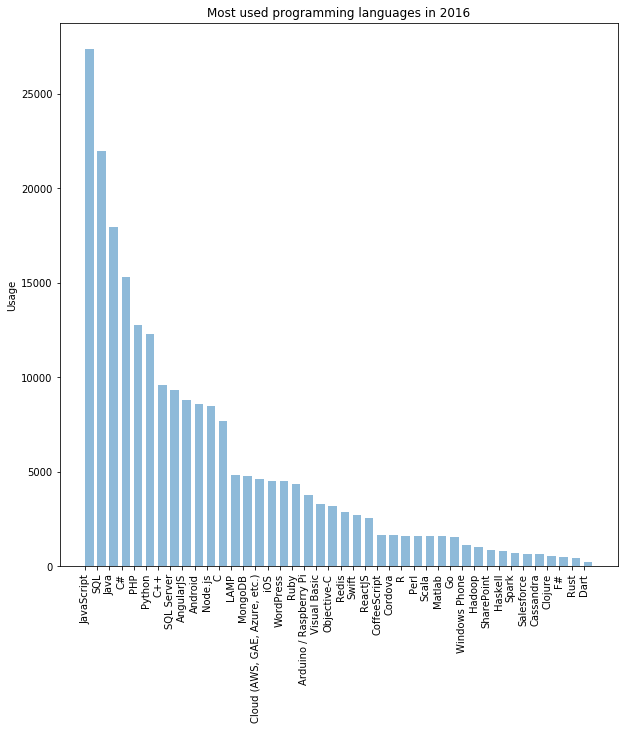

In [25]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2016['Programming Language'], df_2016['Users Count'],
                              90,'Usage','Most used programming languages in 2016',10,10)

## 2017 dataset
Again, a simple one.

In [26]:
#2017 dataset is almost identical to the 2016 one, so we follow with the same steps.
pl_2017 = data_2017['HaveWorkedLanguage']
pl_2017.dropna(inplace=True)
pl_2017_counter = defaultdict(int)
for st in pl_2017:
    row = st.split(';')
    for subst in row:
        pl_2017_counter[subst.strip()]+=1 #Again this is used to prevent the leading white space problem which caused
                                          #duplicate entries and incorrect data.

df_2017 = pd.DataFrame(list(pl_2017_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2017.reset_index(drop=True,inplace=True)
display(df_2017)

Programming Language  Users Count
0            JavaScript        22875
1                   SQL        18754
2                  Java        14524
3                    C#        12476
4                Python        11704
5                   PHP        10290
6                   C++         8155
7                     C         6974
8            TypeScript         3488
9                  Ruby         3324
10                Swift         2368
11          Objective-C         2349
12               VB.NET         2273
13             Assembly         1823
14                    R         1634
15                 Perl         1585
16                  VBA         1574
17               Matlab         1569
18                   Go         1557
19                Scala         1309
20               Groovy         1193
21         CoffeeScript         1192
22       Visual Basic 6         1071
23                  Lua         1039
24              Haskell          649
25                   F#          457
26                 Rust          416
27              Clojure          391
28               Elixir          380
29            Smalltalk          327
30               Erlang          281
31          Common Lisp          273
32                 Dart          145
33                Julia          138
34                 Hack          107

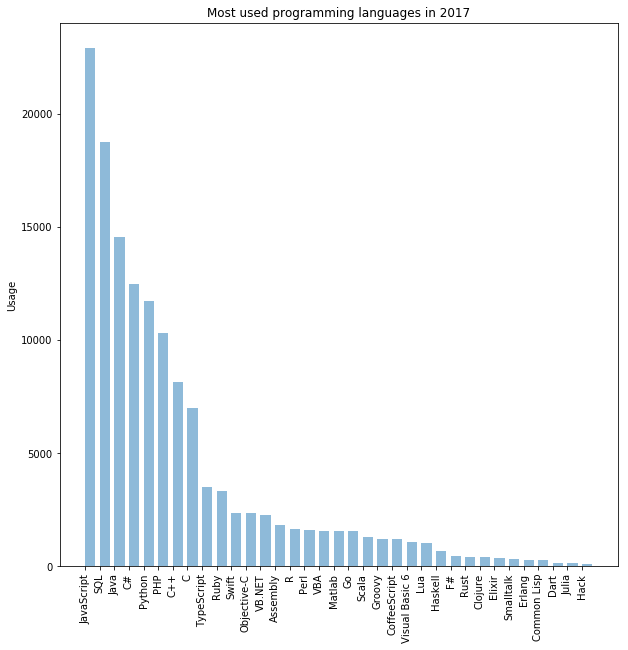

In [27]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2017['Programming Language'], df_2017['Users Count'],
                              90,'Usage','Most used programming languages in 2017',10,10)

## 2018 dataset
from 2017 to 2019, the steps are almost the same.

In [28]:
#2018 dataset
pl_2018 = data_2018['LanguageWorkedWith']
pl_2018.dropna(inplace=True)
pl_2018_counter = defaultdict(int)
for st in pl_2018:
    row = st.split(';')
    for subst in row:
        pl_2018_counter[subst.strip()]+=1
        
df_2018 = pd.DataFrame(list(pl_2018_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2018.reset_index(drop=True,inplace=True)
display(df_2018)

Programming Language  Users Count
0             JavaScript        54686
1                   HTML        53628
2                    CSS        50979
3                    SQL        44670
4                   Java        35521
5             Bash/Shell        31172
6                 Python        30359
7                     C#        26954
8                    PHP        24071
9                    C++        19872
10                     C        18042
11            TypeScript        13626
12                  Ruby         7911
13                 Swift         6310
14              Assembly         5760
15                    Go         5532
16           Objective-C         5510
17                VB.NET         5254
18                     R         4813
19                Matlab         4564
20                   VBA         3810
21                Kotlin         3508
22                 Scala         3420
23                Groovy         3373
24                  Perl         3280
25        Visual Basic 6         3087
26                   Lua         2733
27          CoffeeScript         2603
28  Delphi/Object Pascal         2025
29               Haskell         1961
30                  Rust         1857
31                    F#         1115
32               Clojure         1032
33                Erlang          886
34                 Cobol          590
35                 Ocaml          470
36                 Julia          430
37                  Hack          254

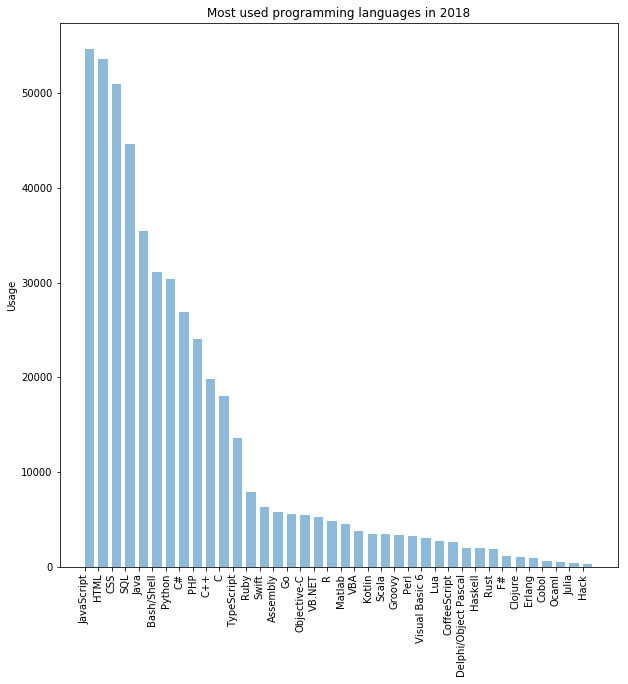

In [29]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2018['Programming Language'], df_2018['Users Count'],
                              90,'Usage','Most used programming languages in 2018',10,10)

## 2019 dataset


In [30]:
#2019 dataset
pl_2019 = data_2019['LanguageWorkedWith']
pl_2019.dropna(inplace=True)
pl_2019_counter = defaultdict(int)
for st in pl_2019:
    row = st.split(';')
    for subst in row:
        pl_2019_counter[subst.strip()]+=1
df_2019 = pd.DataFrame(list(pl_2019_counter.items()),columns=['Programming Language','Users Count']).sort_values(by=['Users Count'],ascending=False)
df_2019.reset_index(drop=True,inplace=True)
display(df_2019)

Programming Language  Users Count
0              JavaScript        59219
1                HTML/CSS        55466
2                     SQL        47544
3                  Python        36443
4                    Java        35917
5   Bash/Shell/PowerShell        31991
6                      C#        27097
7                     PHP        23030
8                     C++        20524
9              TypeScript        18523
10                      C        18017
11              Other(s):         7920
12                   Ruby         7331
13                     Go         7201
14               Assembly         5833
15                  Swift         5744
16                 Kotlin         5620
17                      R         5048
18                    VBA         4781
19            Objective-C         4191
20                  Scala         3309
21                   Rust         2794
22                   Dart         1683
23                 Elixir         1260
24                Clojure         1254
25            WebAssembly         1015
26                     F#          973
27                 Erlang          777

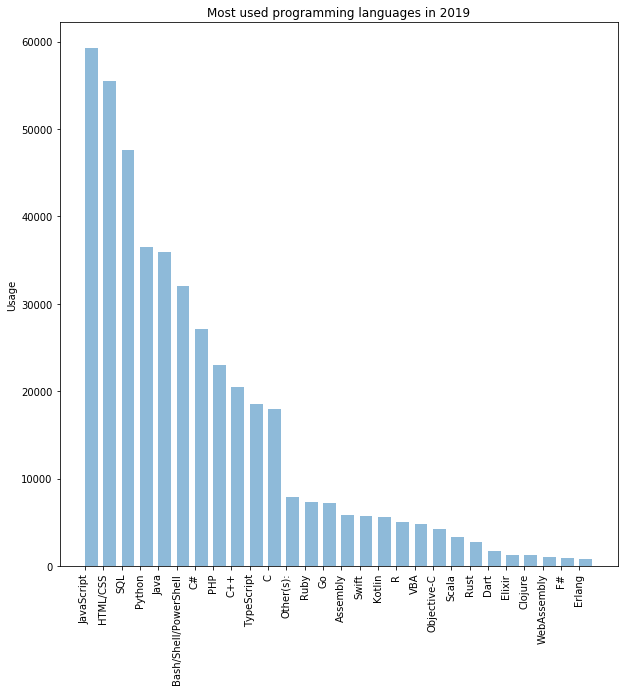

In [31]:
#Plot the data
hlpr.plot_barchart_dictionary(df_2019['Programming Language'], df_2019['Users Count'],
                              90,'Usage','Most used programming languages in 2019',10,10)

# Results:

* __What are the most used technologies/programming languages over the years ?__

    It appears that __JavaScript__ held the number one spot over the years, followed by SQL, Java, C#.
    Is it because JavaScript is used in many areas of Web Development ? Is SQL because of the need to handle data ?
    Let me know your opinion on that...
    
    
* __What are the new technologies that emerged recently ?__

    Looking through the data, it seems that starting from 2015 and onwards, new technologies emerged such as: Android, iOS,
    MongoDB, Arudino/Raspberry Pi, LAMP and much more that didn't exist in the previous survey results.
    
    
* __How did the appearance of new technologies impact the usage of older ones ?__*

    While the appearance of several new technologies should have impacted the current order of the most used ones, it actually
    didn't with a small exception the rise of Python in 2019...Could it be because of the Machine Learning and Data Science 
    trend ?

# Deploy:
The following [post](https://medium.com/@SherifNasrat/one-programming-language-to-rule-them-all-a31d2ac9a526) on Medium.com serves as our deployment method where the findings are explained.